# TASK


#Project 1-Sales Forecasting

## Overview
The main objective of this project (e.g., predicting sales based on historical data).
A brief explanation of the approaches used (VARMAX for multi-variable relationships, LSTM for complex time-series patterns).


## Dataset
Data source.
Description of key features (date, sales, promotion, external variables).
Handling missing value and date.


## Tools & Technologies Used
Environment: Google Colab / Jupyter Notebook / Local Python Environment.
Modeling Tools:
VARMAX using statsmodels.tsa.statespace.varmax.VARMAX
LSTM using tensorflow.keras


## Data Preprocessing
Feature normalization / standardization.
Time transformations (lag features, differencing for VARMAX).
Splitting data into train and test sets.


## Model Development
VARMAX : Selecting optimal parameters (p, q), performance evaluation using MSE or AIC/BIC.
LSTM : Model architecture (number of layers, dropout, activation functions), hyperparameter selection (optimizer, batch size, epochs), callback functions such as EarlyStopping


## Model Evaluation & Comparison
Evaluation metrics: RMSE, MAE, MAPE.
Performance comparison of VARMAX vs. LSTM.
Visualization of predictions vs. actual values.


# IMPORTS

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATA + EDA

**store_nbr**          store_nbr identifies the store at which the products are sold.<br><br>
**family**          family identifies the type of product sold.<br><br>
**sales**          sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).<br><br>
**onpromotion**          onpromotion gives the total number of items in a product family that were being promoted at a store at a given date.<br><br>
**dcoilwtico**          dcoilwtico defines daily oil price. It contains the date and the dcoilwtico. The “dcoilwtico” data represents the daily values of the West Texas Intermediate(WTI)crude oil price index, which is important for tracking and analyzing trends in the oil market. Ecuador is an oil-dependent country and its economic health is highly vulnerable to shocks in oil prices. <br><br>




In [122]:
original_df = pd.read_csv('store5.csv')

In [123]:
original_df.head()


id        date  store_nbr      family  sales  onpromotion  dcoilwtico
0  1452  2013-01-01          5  AUTOMOTIVE    0.0            0         NaN
1  1453  2013-01-01          5   BABY CARE    0.0            0         NaN
2  1454  2013-01-01          5      BEAUTY    0.0            0         NaN
3  1455  2013-01-01          5   BEVERAGES    0.0            0         NaN
4  1456  2013-01-01          5       BOOKS    0.0            0         NaN

In [124]:
original_df.describe().T

count          mean            std      min        25%  \
id           55572.0  1.501021e+06  866289.388951  1452.00  751236.50   
store_nbr    55572.0  5.000000e+00       0.000000     5.00       5.00   
sales        55572.0  2.805802e+02     652.588149     0.00       1.00   
onpromotion  55572.0  2.687864e+00      11.748996     0.00       0.00   
dcoilwtico   38379.0  6.792559e+01      25.666659    26.19      46.38   

                    50%        75%         max  
id           1501021.00  2250805.5  3000590.00  
store_nbr          5.00        5.0        5.00  
sales             19.00      237.0     8216.62  
onpromotion        0.00        0.0      182.00  
dcoilwtico        53.33       95.8      110.62

In [125]:
original_df[original_df.duplicated()]

Empty DataFrame
Columns: [id, date, store_nbr, family, sales, onpromotion, dcoilwtico]
Index: []

In [126]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55572 entries, 0 to 55571
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           55572 non-null  int64  
 1   date         55572 non-null  object 
 2   store_nbr    55572 non-null  int64  
 3   family       55572 non-null  object 
 4   sales        55572 non-null  float64
 5   onpromotion  55572 non-null  int64  
 6   dcoilwtico   38379 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 3.0+ MB


In [127]:
original_df[original_df.duplicated()]

Empty DataFrame
Columns: [id, date, store_nbr, family, sales, onpromotion, dcoilwtico]
Index: []

In [128]:
sales_df=original_df.copy(deep=True)
print(sales_df[sales_df.duplicated()])
sales_df['date']=pd.to_datetime(sales_df['date'])

sales_df['weekdays'] = sales_df['date'].dt.day_name()  # Weekday name (e.g., 'Monday')
sales_df['week_of_the_year'] = sales_df['date'].dt.isocalendar().week  # Week of the year
sales_df['year'] = sales_df['date'].dt.year  # Year
sales_df['month'] = sales_df['date'].dt.month  # Month
sales_df['day'] = sales_df['date'].dt.day  # Day of the month

print(sales_df.info())
print(sales_df[sales_df.duplicated()])

Empty DataFrame
Columns: [id, date, store_nbr, family, sales, onpromotion, dcoilwtico]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55572 entries, 0 to 55571
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                55572 non-null  int64         
 1   date              55572 non-null  datetime64[ns]
 2   store_nbr         55572 non-null  int64         
 3   family            55572 non-null  object        
 4   sales             55572 non-null  float64       
 5   onpromotion       55572 non-null  int64         
 6   dcoilwtico        38379 non-null  float64       
 7   weekdays          55572 non-null  object        
 8   week_of_the_year  55572 non-null  UInt32        
 9   year              55572 non-null  int64         
 10  month             55572 non-null  int64         
 11  day               55572 non-null  int64         
dtypes: UInt32(1), datetime64[ns](1), 

In [129]:
print(sales_df.describe().T)

                    count         mean            std     min       25%  \
id                55572.0    1501021.0  866289.388951  1452.0  751236.5   
store_nbr         55572.0          5.0            0.0     5.0       5.0   
sales             55572.0   280.580231     652.588149     0.0       1.0   
onpromotion       55572.0     2.687864      11.748996     0.0       0.0   
dcoilwtico        38379.0    67.925589      25.666659   26.19     46.38   
week_of_the_year  55572.0    25.242874      14.794802     1.0      13.0   
year              55572.0  2014.837886        1.34553  2013.0    2014.0   
month             55572.0     6.207838       3.385698     1.0       3.0   
day               55572.0    15.630048       8.794867     1.0       8.0   

                        50%        75%        max  
id                1501021.0  2250805.5  3000590.0  
store_nbr               5.0        5.0        5.0  
sales                  19.0      237.0    8216.62  
onpromotion             0.0        0.0   

In [130]:
print(sales_df.head())

     id       date  store_nbr      family  sales  onpromotion  dcoilwtico  \
0  1452 2013-01-01          5  AUTOMOTIVE    0.0            0         NaN   
1  1453 2013-01-01          5   BABY CARE    0.0            0         NaN   
2  1454 2013-01-01          5      BEAUTY    0.0            0         NaN   
3  1455 2013-01-01          5   BEVERAGES    0.0            0         NaN   
4  1456 2013-01-01          5       BOOKS    0.0            0         NaN   

  weekdays  week_of_the_year  year  month  day  
0  Tuesday                 1  2013      1    1  
1  Tuesday                 1  2013      1    1  
2  Tuesday                 1  2013      1    1  
3  Tuesday                 1  2013      1    1  
4  Tuesday                 1  2013      1    1  


In [131]:
print(sales_df.columns)

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'dcoilwtico', 'weekdays', 'week_of_the_year', 'year', 'month', 'day'],
      dtype='object')


In [132]:
print(sales_df['store_nbr'].unique()) 
# semua berisi 5 (nomor toko), jadi dibuang saja

sales_df=sales_df[['id', 'date', 'family', 'sales', 'onpromotion', 'dcoilwtico','weekdays', 'week_of_the_year', 'year', 'month', 'day']]


[5]


In [133]:
print(sales_df.columns)

Index(['id', 'date', 'family', 'sales', 'onpromotion', 'dcoilwtico',
       'weekdays', 'week_of_the_year', 'year', 'month', 'day'],
      dtype='object')


In [134]:
jml_unique_family = sales_df['family'].nunique()
print(f'jml_unique_family = {jml_unique_family}')
#tiap tanggal seharusnya ada 33 row data
print('')
print(sales_df['family'].unique())



jml_unique_family = 33

['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']


                  sales
family                 
GROCERY I  5.262682e+06
BEVERAGES  2.533831e+06
CLEANING   1.667748e+06
PRODUCE    1.653582e+06
DAIRY      8.712830e+05


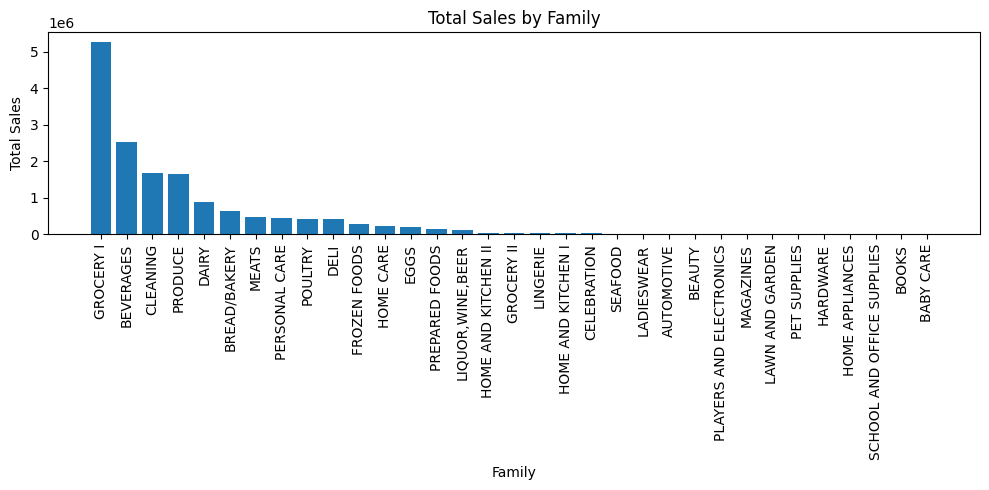

In [135]:
df = sales_df.groupby('family')[['sales']].sum()
df = df.sort_values(by='sales', ascending=False)

plt.figure(figsize=(10,5))
bars=plt.bar(df.index, df['sales'])

plt.xlabel('Family')
plt.ylabel('Total Sales')
plt.title('Total Sales by Family')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show

print(df.head())

In [136]:
sales_df = sales_df[sales_df['family']=='GROCERY I']

C:\Users\andyp\AppData\Local\Temp\ipykernel_26060\3286099896.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson_corr = df.corr()


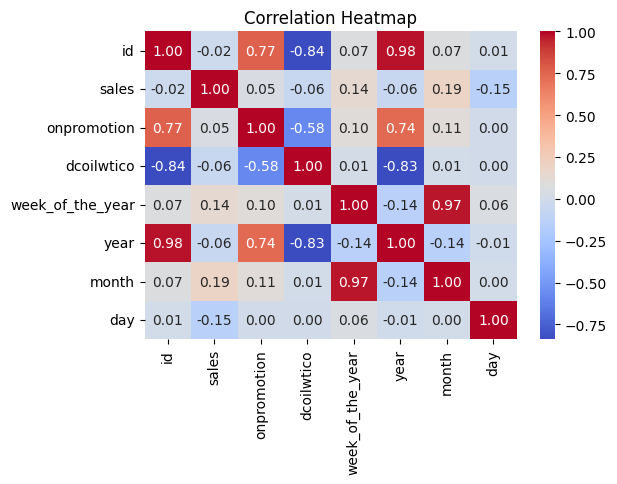

In [137]:
# Heatmap of correlation
df = sales_df
pearson_corr = df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [138]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df = sales_df
temp=df.groupby('weekdays')[['date','family','sales','onpromotion','dcoilwtico']].count().reindex(weekday_order)
# temp = temp.div(33).astype(int)
temp

#melihat dari data ini , family, sales, onpromotion ada datanya , sedangkan dcoilwtico banyak missing data, dan selalu kosong pada saturday dan sunday

date  family  sales  onpromotion  dcoilwtico
weekdays                                               
Monday      241     241    241          241         218
Tuesday     242     242    242          242         240
Wednesday   240     240    240          240         239
Thursday    240     240    240          240         234
Friday      240     240    240          240         232
Saturday    241     241    241          241           0
Sunday      240     240    240          240           0

## Insert Missing Date

In [139]:
min_date = sales_df['date'].min()
max_date = sales_df['date'].max()
print(f'min_date={min_date}')
print(f'max_date={max_date}')


tanggalan = pd.date_range(start=min_date, end=max_date, freq='D')
print(tanggalan)

# Find the missing dates by comparing the full range with the existing dates
missing_dates = tanggalan.difference(sales_df['date'])

print()
print(f'missing_dates = {missing_dates}')

min_date=2013-01-01 00:00:00
max_date=2017-08-15 00:00:00
DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', length=1688, freq='D')

missing_dates = DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


In [140]:
temp = sales_df[sales_df['date'] == pd.to_datetime('2013-01-01')]
# temp['date']=pd.to_datetime('2013-12-25')
temp.loc[:, 'date'] = pd.to_datetime('2013-12-25')

temp2 = sales_df[sales_df['date'] == pd.to_datetime('2013-01-01')]
# temp2['date']=pd.to_datetime('2014-12-25')
temp2.loc[:, 'date'] = pd.to_datetime('2014-12-25')

temp = pd.concat([temp, temp2])

temp2 = sales_df[sales_df['date'] == pd.to_datetime('2013-01-01')]
# temp2['date']=pd.to_datetime('2015-12-25')
temp2.loc[:, 'date'] = pd.to_datetime('2015-12-25')
temp = pd.concat([temp, temp2])

temp2 = sales_df[sales_df['date'] == pd.to_datetime('2013-01-01')]
# temp2['date']=pd.to_datetime('2016-12-25')
temp2.loc[:, 'date'] = pd.to_datetime('2016-12-25')
temp = pd.concat([temp, temp2], ignore_index=True)


sales_df = pd.concat([sales_df, temp], ignore_index=True)



C:\Users\andyp\AppData\Local\Temp\ipykernel_26060\4006493657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:, 'date'] = pd.to_datetime('2013-12-25')
C:\Users\andyp\AppData\Local\Temp\ipykernel_26060\4006493657.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp.loc[:, 'date'] = pd.to_datetime('2013-12-25')
C:\Users\andyp\AppData\Local\Temp\ipykernel_26060\4006493657.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [141]:
#sorting the dataframe
sales_df = sales_df.sort_values(by=['date', 'family']).reset_index(drop=True)
sales_df=sales_df.sort_values(by='date')

## Creating Dummy Variable (separating date components)

In [142]:
sales_df['weekdays'] = sales_df['date'].dt.day_name()  # Weekday name (e.g., 'Monday')
sales_df['week_of_the_year'] = sales_df['date'].dt.isocalendar().week  # Week of the year
sales_df['year'] = sales_df['date'].dt.year  # Year
sales_df['month'] = sales_df['date'].dt.month  # Month
sales_df['day'] = sales_df['date'].dt.day  # Day of the month

In [143]:
df=sales_df[(sales_df['month']==1) & (sales_df['day']==1)]
print(df) 
#tahun baru 
#toko libur, promo libur, harga minyak kosong

           id       date     family  sales  onpromotion  dcoilwtico  \
0        1464 2013-01-01  GROCERY I    0.0            0         NaN   
365    650112 2014-01-01  GROCERY I    0.0            0         NaN   
730   1298760 2015-01-01  GROCERY I    0.0            0         NaN   
1095  1947408 2016-01-01  GROCERY I    0.0            0         NaN   
1461  2597838 2017-01-01  GROCERY I    0.0            0         NaN   

       weekdays  week_of_the_year  year  month  day  
0       Tuesday                 1  2013      1    1  
365   Wednesday                 1  2014      1    1  
730    Thursday                 1  2015      1    1  
1095     Friday                53  2016      1    1  
1461     Sunday                52  2017      1    1  


In [144]:
df=sales_df[(sales_df['month']==12) & (sales_df['day']==31)]
print(df) 
#akhir tahun tetap buka

           id       date     family    sales  onpromotion  dcoilwtico  \
364    648330 2013-12-31  GROCERY I  4271.00            0       98.17   
729   1296978 2014-12-31  GROCERY I  4459.00           11       53.45   
1094  1945626 2015-12-31  GROCERY I  4327.23            1       37.13   
1460  2596056 2016-12-31  GROCERY I  4615.00          112         NaN   

       weekdays  week_of_the_year  year  month  day  
364     Tuesday                 1  2013     12   31  
729   Wednesday                 1  2014     12   31  
1094   Thursday                53  2015     12   31  
1460   Saturday                52  2016     12   31  


In [145]:
df=sales_df[(sales_df['month']==12) & (sales_df['day']==25)]
print(df) 
#natal libur
#toko libur, promo libur, harga minyak kosong

        id       date     family  sales  onpromotion  dcoilwtico   weekdays  \
358   1464 2013-12-25  GROCERY I    0.0            0         NaN  Wednesday   
723   1464 2014-12-25  GROCERY I    0.0            0         NaN   Thursday   
1088  1464 2015-12-25  GROCERY I    0.0            0         NaN     Friday   
1454  1464 2016-12-25  GROCERY I    0.0            0         NaN     Sunday   

      week_of_the_year  year  month  day  
358                 52  2013     12   25  
723                 52  2014     12   25  
1088                52  2015     12   25  
1454                51  2016     12   25  


## Creating Dummy Variable (Weekend and Holiday)

In [146]:
sales_df['isWeekend'] = sales_df['weekdays'].isin(['Saturday', 'Sunday']).astype(int)
sales_df['isHoliday'] = ((sales_df['month'] == 12) & (sales_df['day']== 25)).astype(int)
sales_df['isHoliday'] = sales_df['isHoliday'] | ((sales_df['date'].dt.month == 1) & (sales_df['date'].dt.day == 1)).astype(int)

In [147]:
df=sales_df[(sales_df['isWeekend']==1) ]
print(df) 
#weekend tetap jualan
# info harga oil kosong

           id       date     family   sales  onpromotion  dcoilwtico  \
4        8592 2013-01-05  GROCERY I  3398.0            0         NaN   
5       10374 2013-01-06  GROCERY I  4643.0            0         NaN   
11      21066 2013-01-12  GROCERY I  2938.0            0         NaN   
12      22848 2013-01-13  GROCERY I  4064.0            0         NaN   
18      33540 2013-01-19  GROCERY I  2941.0            0         NaN   
...       ...        ...        ...     ...          ...         ...   
1671  2972058 2017-07-30  GROCERY I  3780.0           62         NaN   
1677  2982750 2017-08-05  GROCERY I  3396.0           41         NaN   
1678  2984532 2017-08-06  GROCERY I  3460.0           37         NaN   
1684  2995224 2017-08-12  GROCERY I  2476.0           31         NaN   
1685  2997006 2017-08-13  GROCERY I  3141.0           31         NaN   

      weekdays  week_of_the_year  year  month  day  isWeekend  isHoliday  
4     Saturday                 1  2013      1    5          

In [148]:
sales_df

id       date     family   sales  onpromotion  dcoilwtico  \
0        1464 2013-01-01  GROCERY I     0.0            0         NaN   
1        3246 2013-01-02  GROCERY I  4558.0            0       93.14   
2        5028 2013-01-03  GROCERY I  3260.0            0       92.97   
3        6810 2013-01-04  GROCERY I  3085.0            0       93.12   
4        8592 2013-01-05  GROCERY I  3398.0            0         NaN   
...       ...        ...        ...     ...          ...         ...   
1683  2993442 2017-08-11  GROCERY I  2864.0           35       48.81   
1684  2995224 2017-08-12  GROCERY I  2476.0           31         NaN   
1685  2997006 2017-08-13  GROCERY I  3141.0           31         NaN   
1686  2998788 2017-08-14  GROCERY I  2717.0           32       47.59   
1687  3000570 2017-08-15  GROCERY I  2696.0           26       47.57   

       weekdays  week_of_the_year  year  month  day  isWeekend  isHoliday  
0       Tuesday                 1  2013      1    1          0          1  
1     Wednesday                 1  2013      1    2          0          0  
2      Thursday                 1  2013      1    3          0          0  
3        Friday                 1  2013      1    4          0          0  
4      Saturday                 1  2013      1    5          1          0  
...         ...               ...   ...    ...  ...        ...        ...  
1683     Friday                32  2017      8   11          0          0  
1684   Saturday                32  2017      8   12          1          0  
1685     Sunday                32  2017      8   13          1          0  
1686     Monday                33  2017      8   14          0          0  
1687    Tuesday                33  2017      8   15          0          0  

[1688 rows x 13 columns]

## Handle Missing Value for dcoilwtico

In [149]:
sales_df['oil_fill']=sales_df['dcoilwtico']
sales_df['oil_fill']=sales_df['oil_fill'].interpolate(method='linear')
sales_df['oil_fill'] = sales_df['oil_fill'].fillna(method='bfill')

sales_df

id       date     family   sales  onpromotion  dcoilwtico  \
0        1464 2013-01-01  GROCERY I     0.0            0         NaN   
1        3246 2013-01-02  GROCERY I  4558.0            0       93.14   
2        5028 2013-01-03  GROCERY I  3260.0            0       92.97   
3        6810 2013-01-04  GROCERY I  3085.0            0       93.12   
4        8592 2013-01-05  GROCERY I  3398.0            0         NaN   
...       ...        ...        ...     ...          ...         ...   
1683  2993442 2017-08-11  GROCERY I  2864.0           35       48.81   
1684  2995224 2017-08-12  GROCERY I  2476.0           31         NaN   
1685  2997006 2017-08-13  GROCERY I  3141.0           31         NaN   
1686  2998788 2017-08-14  GROCERY I  2717.0           32       47.59   
1687  3000570 2017-08-15  GROCERY I  2696.0           26       47.57   

       weekdays  week_of_the_year  year  month  day  isWeekend  isHoliday  \
0       Tuesday                 1  2013      1    1          0          1   
1     Wednesday                 1  2013      1    2          0          0   
2      Thursday                 1  2013      1    3          0          0   
3        Friday                 1  2013      1    4          0          0   
4      Saturday                 1  2013      1    5          1          0   
...         ...               ...   ...    ...  ...        ...        ...   
1683     Friday                32  2017      8   11          0          0   
1684   Saturday                32  2017      8   12          1          0   
1685     Sunday                32  2017      8   13          1          0   
1686     Monday                33  2017      8   14          0          0   
1687    Tuesday                33  2017      8   15          0          0   

       oil_fill  
0     93.140000  
1     93.140000  
2     92.970000  
3     93.120000  
4     93.146667  
...         ...  
1683  48.810000  
1684  48.403333  
1685  47.996667  
1686  47.590000  
1687  47.570000  

[1688 rows x 14 columns]

In [150]:
print(sales_df['oil_fill'].isna().sum())

sales_df.info()

0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1688 entries, 0 to 1687
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1688 non-null   int64         
 1   date              1688 non-null   datetime64[ns]
 2   family            1688 non-null   object        
 3   sales             1688 non-null   float64       
 4   onpromotion       1688 non-null   int64         
 5   dcoilwtico        1163 non-null   float64       
 6   weekdays          1688 non-null   object        
 7   week_of_the_year  1688 non-null   UInt32        
 8   year              1688 non-null   int64         
 9   month             1688 non-null   int64         
 10  day               1688 non-null   int64         
 11  isWeekend         1688 non-null   int32         
 12  isHoliday         1688 non-null   int32         
 13  oil_fill          1688 non-null   float64       
dtypes: UInt32(1), datetime

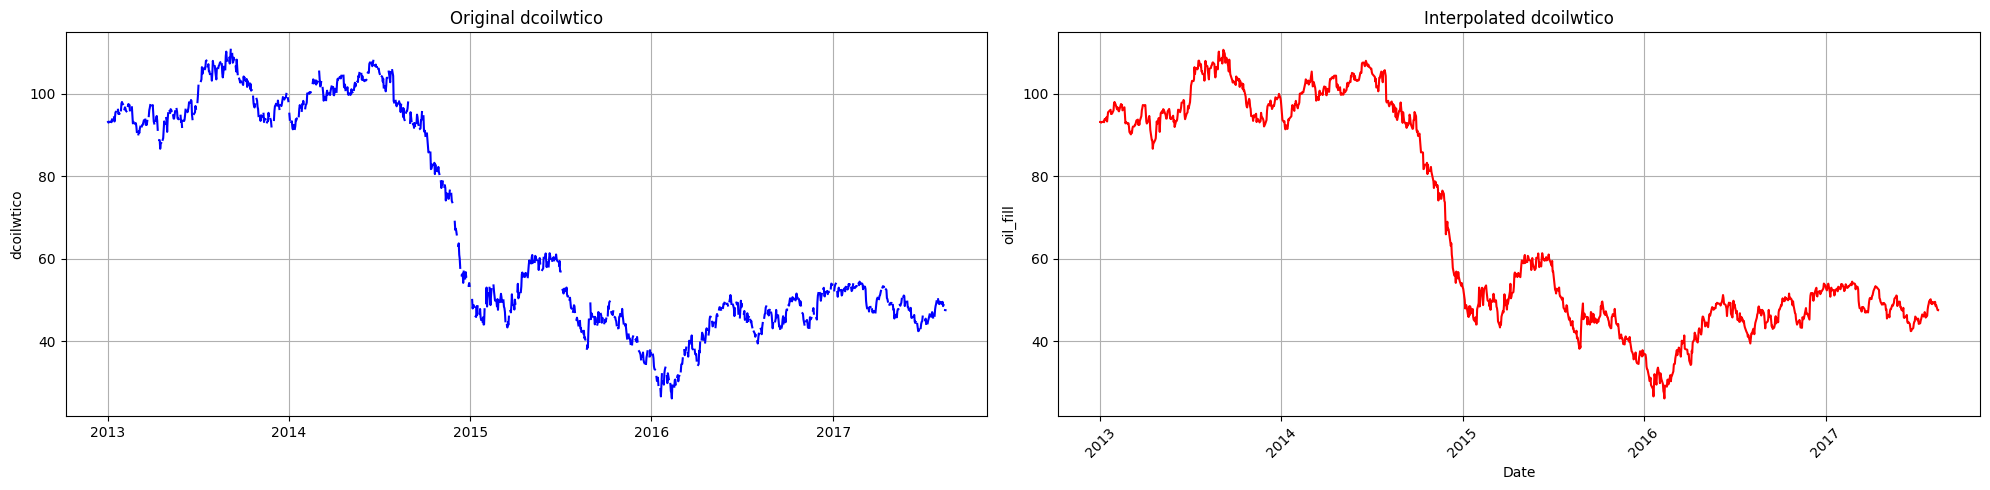

In [151]:

fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharex=True)

axes[0].plot(sales_df['date'], sales_df['dcoilwtico'], color='b')
axes[0].set_title('Original dcoilwtico')
axes[0].set_ylabel('dcoilwtico')
axes[0].grid(True)

axes[1].plot(sales_df['date'], sales_df['oil_fill'],  color='r')
axes[1].set_title('Interpolated dcoilwtico')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('oil_fill')
axes[1].grid(True)

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()


In [152]:
sales_df.sample(n=21 , random_state=42)

id       date     family     sales  onpromotion  dcoilwtico  \
1251  2225400 2016-06-05  GROCERY I  4383.000           69         NaN   
494    879990 2014-05-10  GROCERY I  4144.000            0         NaN   
203    363210 2013-07-23  GROCERY I  2703.000            0      107.13   
479    853260 2014-04-25  GROCERY I  2286.000            0      100.85   
886   1576752 2015-06-06  GROCERY I  3725.000           18         NaN   
1134  2016906 2016-02-09  GROCERY I  2167.000           64       27.96   
1211  2154120 2016-04-26  GROCERY I  2210.000           32       42.52   
427    760596 2014-03-04  GROCERY I  2539.000            0      103.64   
1277  2271732 2016-07-01  GROCERY I  3502.000           56       49.02   
1633  2904342 2017-06-22  GROCERY I  2652.000           54       42.53   
173    309750 2013-06-23  GROCERY I  3848.000            0         NaN   
745   1325490 2015-01-16  GROCERY I  2744.000           12       48.49   
986   1754952 2015-09-14  GROCERY I  2820.000            9       44.07   
1398  2487354 2016-10-30  GROCERY I  3577.000           82         NaN   
1667  2964930 2017-07-26  GROCERY I  2757.000           73       48.58   
1230  2187978 2016-05-15  GROCERY I  3602.000           26         NaN   
1100  1956318 2016-01-06  GROCERY I  3071.451           24       33.97   
785   1396770 2015-02-25  GROCERY I  2679.000            8       50.25   
857   1525074 2015-05-08  GROCERY I  3370.000           10       59.41   
1507  2679810 2017-02-16  GROCERY I  2199.000           50       53.41   
135    242034 2013-05-16  GROCERY I  2636.000            0       94.85   

       weekdays  week_of_the_year  year  month  day  isWeekend  isHoliday  \
1251     Sunday                22  2016      6    5          1          0   
494    Saturday                19  2014      5   10          1          0   
203     Tuesday                30  2013      7   23          0          0   
479      Friday                17  2014      4   25          0          0   
886    Saturday                23  2015      6    6          1          0   
1134    Tuesday                 6  2016      2    9          0          0   
1211    Tuesday                17  2016      4   26          0          0   
427     Tuesday                10  2014      3    4          0          0   
1277     Friday                26  2016      7    1          0          0   
1633   Thursday                25  2017      6   22          0          0   
173      Sunday                25  2013      6   23          1          0   
745      Friday                 3  2015      1   16          0          0   
986      Monday                38  2015      9   14          0          0   
1398     Sunday                43  2016     10   30          1          0   
1667  Wednesday                30  2017      7   26          0          0   
1230     Sunday                19  2016      5   15          1          0   
1100  Wednesday                 1  2016      1    6          0          0   
785   Wednesday                 9  2015      2   25          0          0   
857      Friday                19  2015      5    8          0          0   
1507   Thursday                 7  2017      2   16          0          0   
135    Thursday                20  2013      5   16          0          0   

      oil_fill  
1251     49.37  
494     100.51  
203     107.13  
479     100.85  
886      58.79  
1134     27.96  
1211     42.52  
427     103.64  
1277     49.02  
1633     42.53  
173      94.65  
745      48.49  
986      44.07  
1398     47.46  
1667     48.58  
1230     47.22  
1100     33.97  
785      50.25  
857      59.41  
1507     53.41  
135      94.85

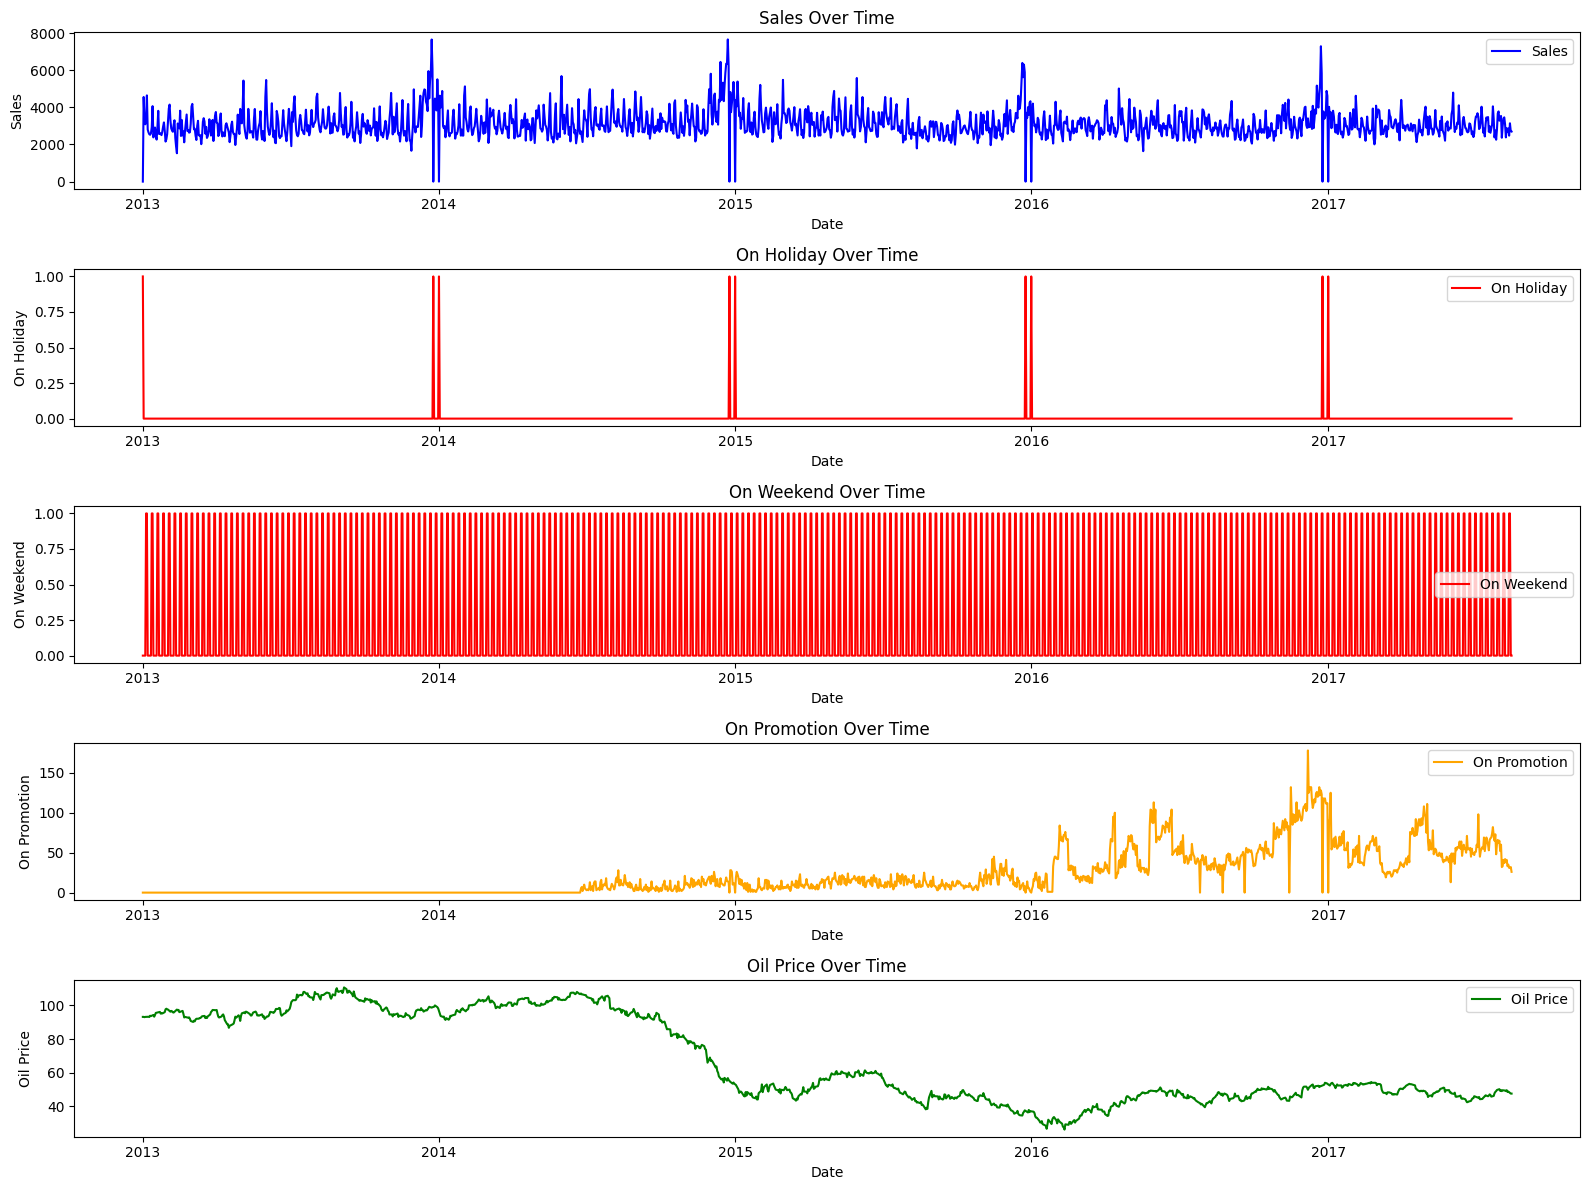

In [153]:
sales_df=sales_df.sort_values(by='date')
df = sales_df
# df=df[df['date']>=pd.to_datetime('2015-12-01')]
# df=df[df['date']<pd.to_datetime('2016-02-01')]


plt.figure(figsize=(16, 12))


plt.subplot(5, 1, 1)
plt.plot(df['date'], df['sales'], color='blue', label='Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(df['date'], df['isHoliday'], color='red', label='On Holiday')
plt.xlabel('Date')
plt.ylabel('On Holiday')
plt.title('On Holiday Over Time')
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(df['date'], df['isWeekend'], color='red', label='On Weekend')
plt.xlabel('Date')
plt.ylabel('On Weekend')
plt.title('On Weekend Over Time')
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(df['date'], df['onpromotion'], color='orange', label='On Promotion')
plt.xlabel('Date')
plt.ylabel('On Promotion')
plt.title('On Promotion Over Time')
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(df['date'], df['oil_fill'], color='green', label='Oil Price')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Oil Price Over Time')
plt.legend()

plt.tight_layout()
plt.show()

c:\Users\andyp\.conda\envs\datly\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


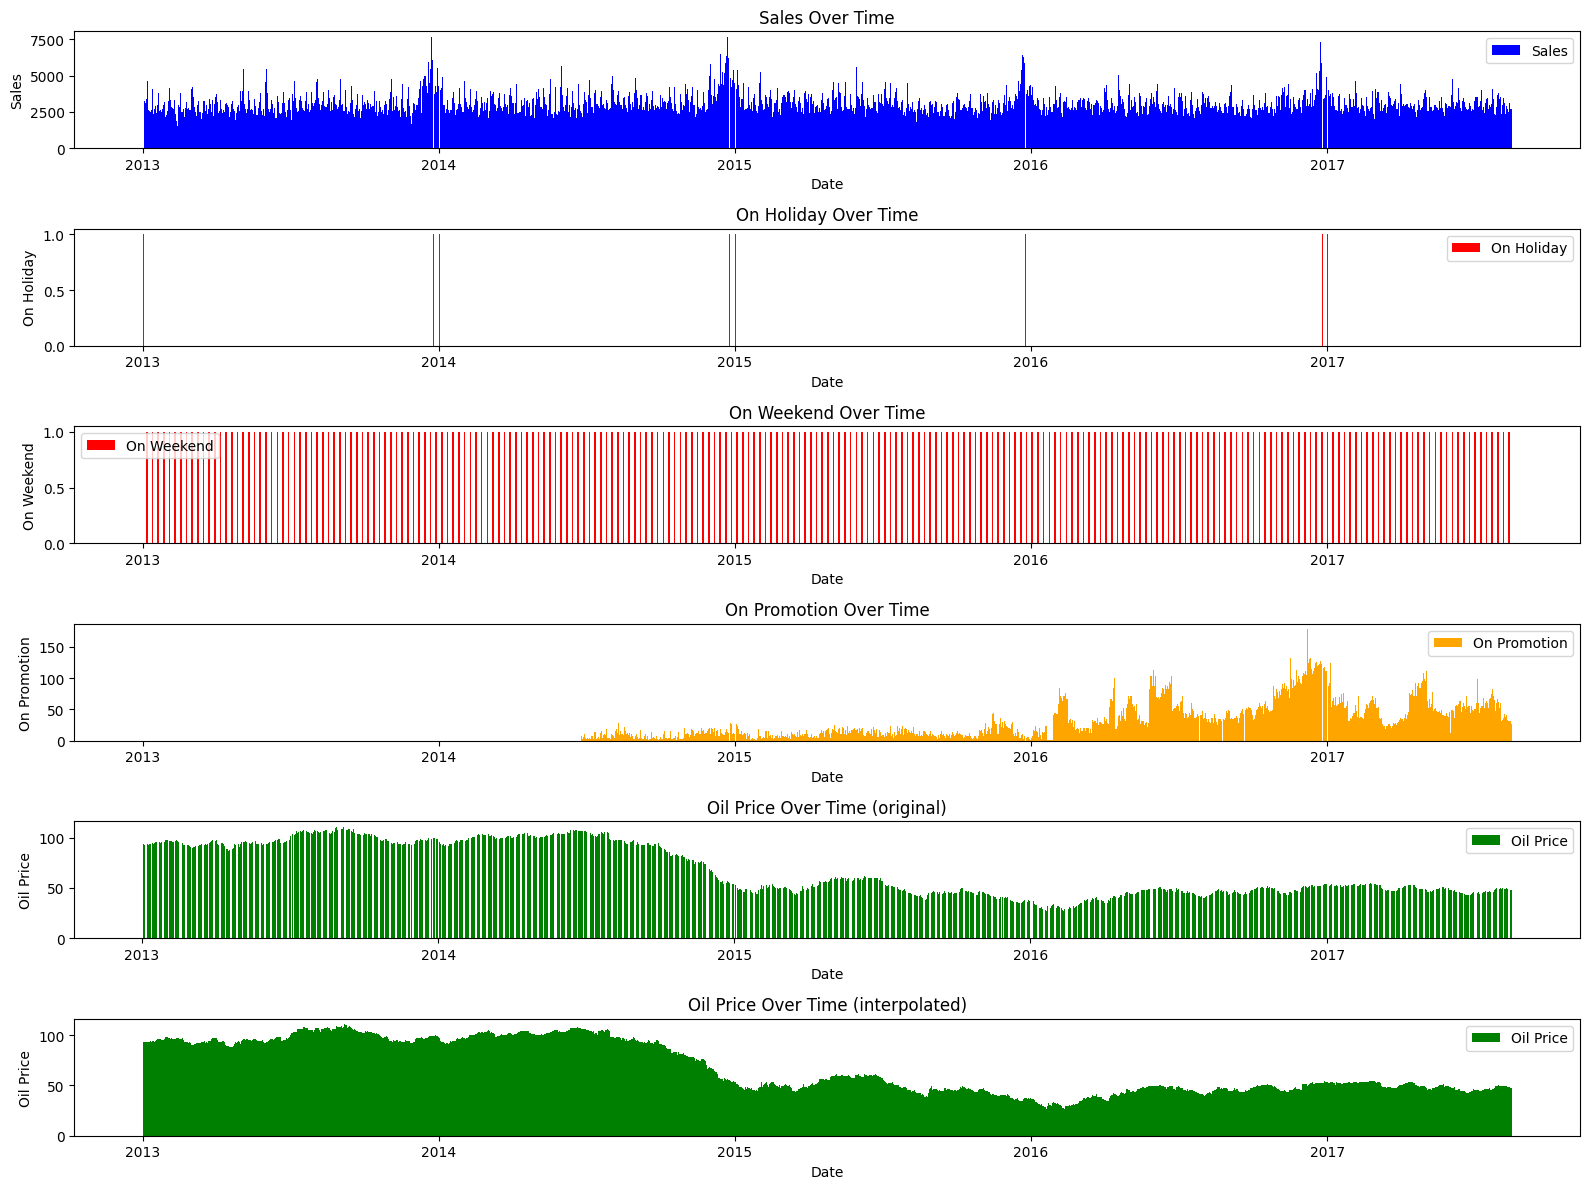

In [154]:

df = sales_df
# df=df[df['date']>=pd.to_datetime('2015-12-01')]
# df=df[df['date']<pd.to_datetime('2016-02-01')]


plt.figure(figsize=(16, 12))


plt.subplot(6, 1, 1)
plt.bar(df['date'], df['sales'], color='blue', label='Sales', align='edge', width=1)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.legend()

plt.subplot(6, 1, 2)
plt.bar(df['date'], df['isHoliday'], color='red', label='On Holiday', align='edge', width=1)
plt.xlabel('Date')
plt.ylabel('On Holiday')
plt.title('On Holiday Over Time')
plt.legend()

plt.subplot(6, 1, 3)
plt.bar(df['date'], df['isWeekend'], color='red', label='On Weekend', align='edge', width=1)
plt.xlabel('Date')
plt.ylabel('On Weekend')
plt.title('On Weekend Over Time')
plt.legend()

plt.subplot(6, 1, 4)
plt.bar(df['date'], df['onpromotion'], color='orange', label='On Promotion', align='edge', width=1)
plt.xlabel('Date')
plt.ylabel('On Promotion')
plt.title('On Promotion Over Time')
plt.legend()

plt.subplot(6, 1, 5)
plt.bar(df['date'], df['dcoilwtico'], color='green', label='Oil Price', align='edge', width=1)
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Oil Price Over Time (original)')
plt.legend()

plt.subplot(6, 1, 6)
plt.bar(df['date'], df['oil_fill'], color='green', label='Oil Price', align='edge', width=1)
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Oil Price Over Time (interpolated)')
plt.legend()

plt.tight_layout()
plt.show()

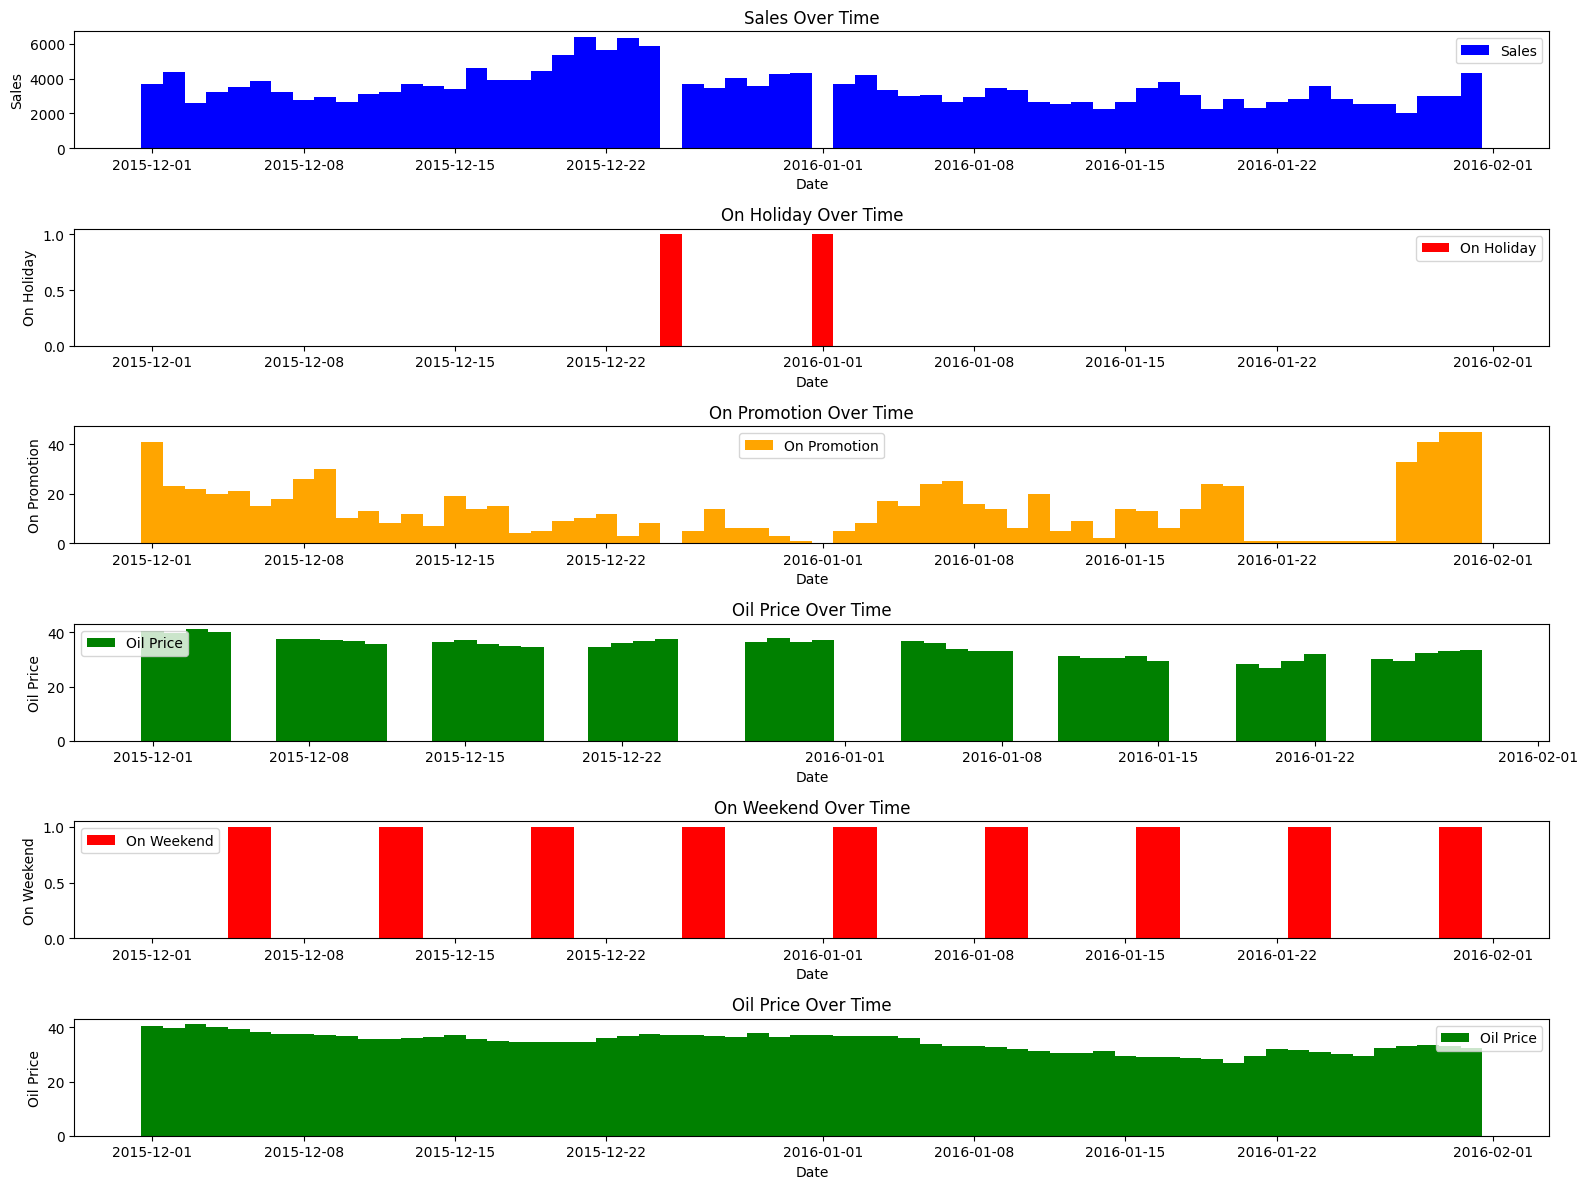

In [155]:
#ingin zooom in sedikit dari grafik di atas

sales_df=sales_df.sort_values(by='date')
df = sales_df
df=df[df['date']>=pd.to_datetime('2015-12-01')]
df=df[df['date']<pd.to_datetime('2016-02-01')]


plt.figure(figsize=(16, 12))


plt.subplot(6, 1, 1)
plt.bar(df['date'], df['sales'], color='blue', label='Sales', align='center', width=1)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.legend()

plt.subplot(6, 1, 2)
plt.bar(df['date'], df['isHoliday'], color='red', label='On Holiday', align='center', width=1)
plt.xlabel('Date')
plt.ylabel('On Holiday')
plt.title('On Holiday Over Time')
plt.legend()

plt.subplot(6, 1, 3)
plt.bar(df['date'], df['onpromotion'], color='orange', label='On Promotion', align='center', width=1)
plt.xlabel('Date')
plt.ylabel('On Promotion')
plt.title('On Promotion Over Time')
plt.legend()

plt.subplot(6, 1, 4)
plt.bar(df['date'], df['dcoilwtico'], color='green', label='Oil Price', align='center', width=1)
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Oil Price Over Time')
plt.legend()

plt.subplot(6, 1, 5)
plt.bar(df['date'], df['isWeekend'], color='red', label='On Weekend', align='center', width=1)
plt.xlabel('Date')
plt.ylabel('On Weekend')
plt.title('On Weekend Over Time')
plt.legend()

plt.subplot(6, 1, 6)
plt.bar(df['date'], df['oil_fill'], color='green', label='Oil Price', align='center', width=1)
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Oil Price Over Time')
plt.legend()

plt.tight_layout()
plt.show()

## Correlation Check

In [156]:
correlation_sales = sales_df[['sales', 'onpromotion']].corr()
print(f'correlation_sales:\n{correlation_sales}')

correlation_sales = sales_df[['sales', 'oil_fill']].corr()
print(f'correlation_oil:\n{correlation_sales}')


correlation_sales:
                sales  onpromotion
sales        1.000000     0.056009
onpromotion  0.056009     1.000000
correlation_oil:
             sales  oil_fill
sales     1.000000  0.013262
oil_fill  0.013262  1.000000


In [157]:
pearson_corr = sales_df[['sales', 'onpromotion', 'dcoilwtico','oil_fill','isHoliday', 'isWeekend']].corr(method='pearson')
spearman_corr = sales_df[['sales', 'onpromotion', 'dcoilwtico','oil_fill','isHoliday', 'isWeekend']].corr(method='spearman')

# Print correlation values
print("Pearson Correlation:\n", pearson_corr)
print("\nSpearman Correlation:\n", spearman_corr)

Pearson Correlation:
                 sales  onpromotion  dcoilwtico  oil_fill  isHoliday  isWeekend
sales        1.000000     0.056009   -0.058505  0.013262  -0.305741   0.454681
onpromotion  0.056009     1.000000   -0.575283 -0.576094  -0.056980   0.013231
dcoilwtico  -0.058505    -0.575283    1.000000  1.000000        NaN        NaN
oil_fill     0.013262    -0.576094    1.000000  1.000000  -0.010776  -0.000536
isHoliday   -0.305741    -0.056980         NaN -0.010776   1.000000  -0.010264
isWeekend    0.454681     0.013231         NaN -0.000536  -0.010264   1.000000

Spearman Correlation:
                 sales  onpromotion  dcoilwtico  oil_fill  isHoliday  isWeekend
sales        1.000000     0.065550   -0.000117  0.041012  -0.126135   0.544110
onpromotion  0.065550     1.000000   -0.708980 -0.700737  -0.087016   0.022155
dcoilwtico  -0.000117    -0.708980    1.000000  1.000000        NaN        NaN
oil_fill     0.041012    -0.700737    1.000000  1.000000  -0.003890  -0.000751
isHoli

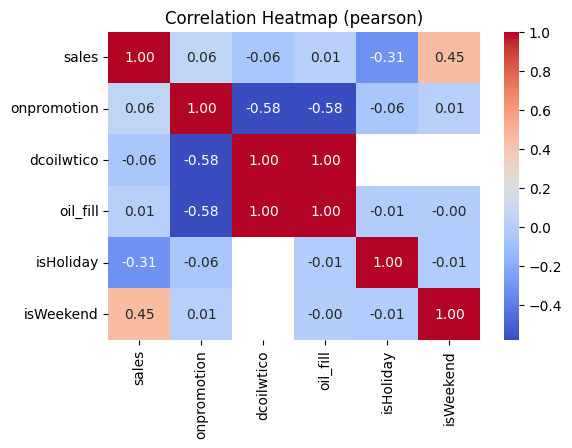

In [158]:
# Heatmap of correlation
plt.figure(figsize=(6, 4))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (pearson)")
plt.show()

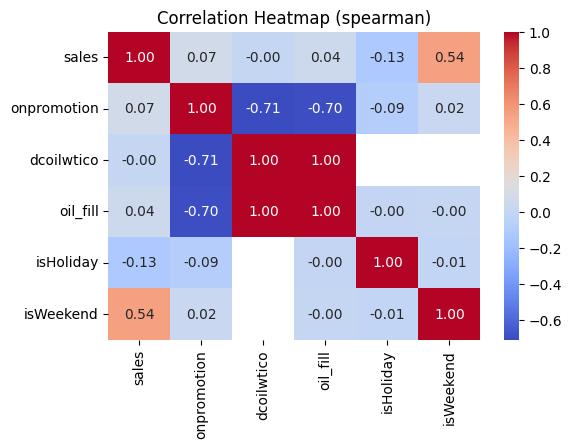

In [159]:
# Heatmap of correlation
plt.figure(figsize=(6, 4))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (spearman)")
plt.show()

In [160]:
df.columns

Index(['id', 'date', 'family', 'sales', 'onpromotion', 'dcoilwtico',
       'weekdays', 'week_of_the_year', 'year', 'month', 'day', 'isWeekend',
       'isHoliday', 'oil_fill'],
      dtype='object')

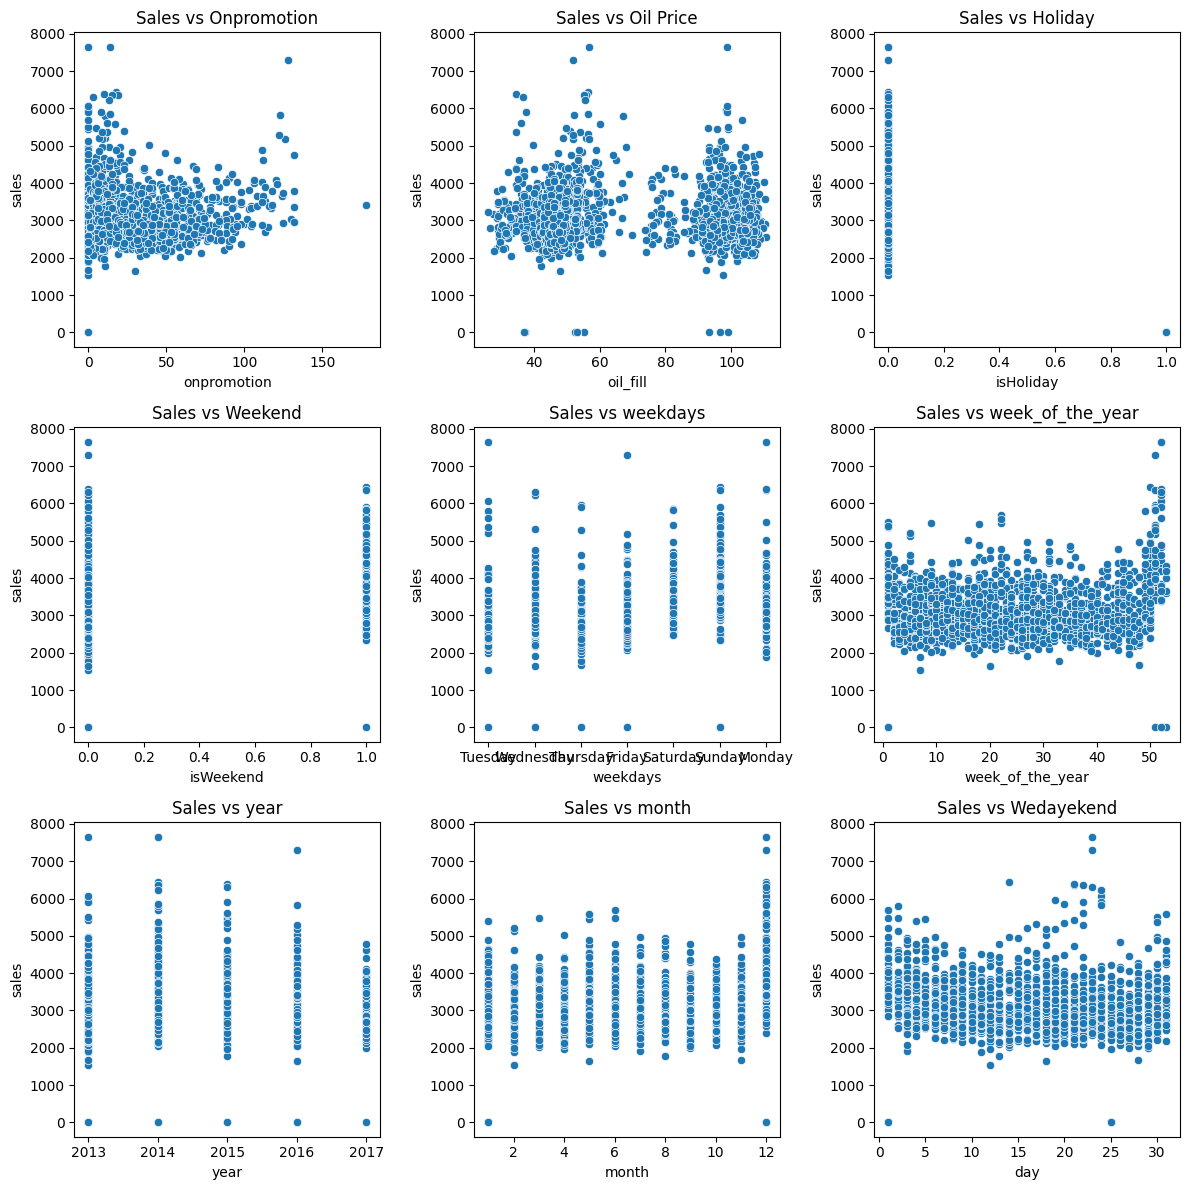

In [161]:
# Scatter plots
plt.figure(figsize=(12, 12))

plt.subplot(3, 3, 1)
sns.scatterplot(data=sales_df, x='onpromotion', y='sales')
plt.title("Sales vs Onpromotion")

plt.subplot(3, 3, 2)
sns.scatterplot(data=sales_df, x='oil_fill', y='sales')
plt.title("Sales vs Oil Price")

plt.subplot(3, 3, 3)
sns.scatterplot(data=sales_df, x='isHoliday', y='sales')
plt.title("Sales vs Holiday")

plt.subplot(3, 3, 4)
sns.scatterplot(data=sales_df, x='isWeekend', y='sales')
plt.title("Sales vs Weekend")

plt.subplot(3, 3, 5)
sns.scatterplot(data=sales_df, x='weekdays', y='sales')
plt.title("Sales vs weekdays")

plt.subplot(3, 3, 6)
sns.scatterplot(data=sales_df, x='week_of_the_year', y='sales')
plt.title("Sales vs week_of_the_year")

plt.subplot(3, 3, 7)
sns.scatterplot(data=sales_df, x='year', y='sales')
plt.title("Sales vs year")

plt.subplot(3, 3, 8)
sns.scatterplot(data=sales_df, x='month', y='sales')
plt.title("Sales vs month")

plt.subplot(3, 3, 9)
sns.scatterplot(data=sales_df, x='day', y='sales')
plt.title("Sales vs Wedayekend")


plt.tight_layout()
plt.show()



terdapat multi collinearity antara 'onpromotion' dan 'oil_fill'<br>
bahasa umumnya "saat harga minyak naik , promosi juga
--> akan dibuang kolom oil_fill dan dcoilwtico

GAK JADI DING ... ternyata disuruh predict juga nilai 'onpromtion' nya 



In [162]:
print(f'sales_df.columns:\n{sales_df.columns}')
sales_df_selected=sales_df[['id', 'date', 'sales', 'onpromotion', 'isWeekend','isHoliday']]
print('')
print(f'sales_df_selected.columns:\n{sales_df_selected.columns}')

sales_df.columns:
Index(['id', 'date', 'family', 'sales', 'onpromotion', 'dcoilwtico',
       'weekdays', 'week_of_the_year', 'year', 'month', 'day', 'isWeekend',
       'isHoliday', 'oil_fill'],
      dtype='object')

sales_df_selected.columns:
Index(['id', 'date', 'sales', 'onpromotion', 'isWeekend', 'isHoliday'], dtype='object')


## ADF Test

In [163]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, name):
    result = adfuller(series.dropna())
    print(f'ADF Test for {name}')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:', result[4])
    
    gc='\u2713'
    rc='\u2716'
    if result[1] <= 0.05:
        print(f"{gc} {name} is STATIONARY (Reject null hypothesis)")
    else:
        print(f"{rc} {name} is NOT STATIONARY (Fail to reject null hypothesis)")
    print("-" * 50)

# Run ADF Test on Sales
adf_test(sales_df['sales'], "Sales [sales]")
adf_test(sales_df['onpromotion'], 'On Promotion [onpromotion]')

#yg di bawah ini tidak perlu , karena yg di cek stationernya cukup yang mau di
adf_test(sales_df['oil_fill'], 'oil_fill')
adf_test(sales_df['isWeekend'], 'isWeekend')
adf_test(sales_df['isHoliday'], 'isHoliday')


ADF Test for Sales [sales]
ADF Statistic: -7.1433
p-value: 0.0000
Critical Values: {'1%': -3.434283579780684, '5%': -2.863277451883613, '10%': -2.5676949772294817}
✓ Sales [sales] is STATIONARY (Reject null hypothesis)
--------------------------------------------------
ADF Test for On Promotion [onpromotion]
ADF Statistic: -2.6803
p-value: 0.0775
Critical Values: {'1%': -3.434283579780684, '5%': -2.863277451883613, '10%': -2.5676949772294817}
✖ On Promotion [onpromotion] is NOT STATIONARY (Fail to reject null hypothesis)
--------------------------------------------------
ADF Test for oil_fill
ADF Statistic: -0.8659
p-value: 0.7990
Critical Values: {'1%': -3.4342322039823197, '5%': -2.863254774066211, '10%': -2.5676829016514233}
✖ oil_fill is NOT STATIONARY (Fail to reject null hypothesis)
--------------------------------------------------
ADF Test for isWeekend
ADF Statistic: -1032450383434032.6250
p-value: 0.0000
Critical Values: {'1%': -3.434243762106336, '5%': -2.863259875977509, '1

In [164]:
print(f'onpromotion = {sales_df.shape}')

onpromotion = (1688, 14)


In [165]:
from scipy.stats import boxcox

# sales_df['oil_fill_donpromotionifferencing'] = sales_df['onpromotion'].diff()
sales_df['onpromotion_differencing'] = sales_df['onpromotion'].diff(periods=7).fillna(0)
adf_test(sales_df['onpromotion_differencing'], 'On Promotion Differencing')

# sales_df['onpromotion_boxcox'], lam = boxcox(sales_df['onpromotion'] + 1)
# adf_test(sales_df['onpromotion_boxcox'], 'On Promotion BoxCox')

sales_df['oil_fill_differencing'] = sales_df['oil_fill'].diff(periods=7).fillna(0)
adf_test(sales_df['oil_fill_differencing'], 'On Oil Price Differencing')

# sales_df['oil_fill_boxcox'], lam = boxcox(sales_df['oil_fill'] + 1)
# adf_test(sales_df['oil_fill_boxcox'], 'On Oil Price BoxCox')



ADF Test for On Promotion Differencing
ADF Statistic: -8.8653
p-value: 0.0000
Critical Values: {'1%': -3.4342812150354276, '5%': -2.8632764080687307, '10%': -2.5676944214132233}
✓ On Promotion Differencing is STATIONARY (Reject null hypothesis)
--------------------------------------------------
ADF Test for On Oil Price Differencing
ADF Statistic: -6.6143
p-value: 0.0000
Critical Values: {'1%': -3.4342812150354276, '5%': -2.8632764080687307, '10%': -2.5676944214132233}
✓ On Oil Price Differencing is STATIONARY (Reject null hypothesis)
--------------------------------------------------


In [166]:
print(f'onpromotion = {sales_df.shape}')
sales_df.to_csv('store_grocery.csv') #bikin backup saja kalau2 nanti ada perlu

onpromotion = (1688, 16)


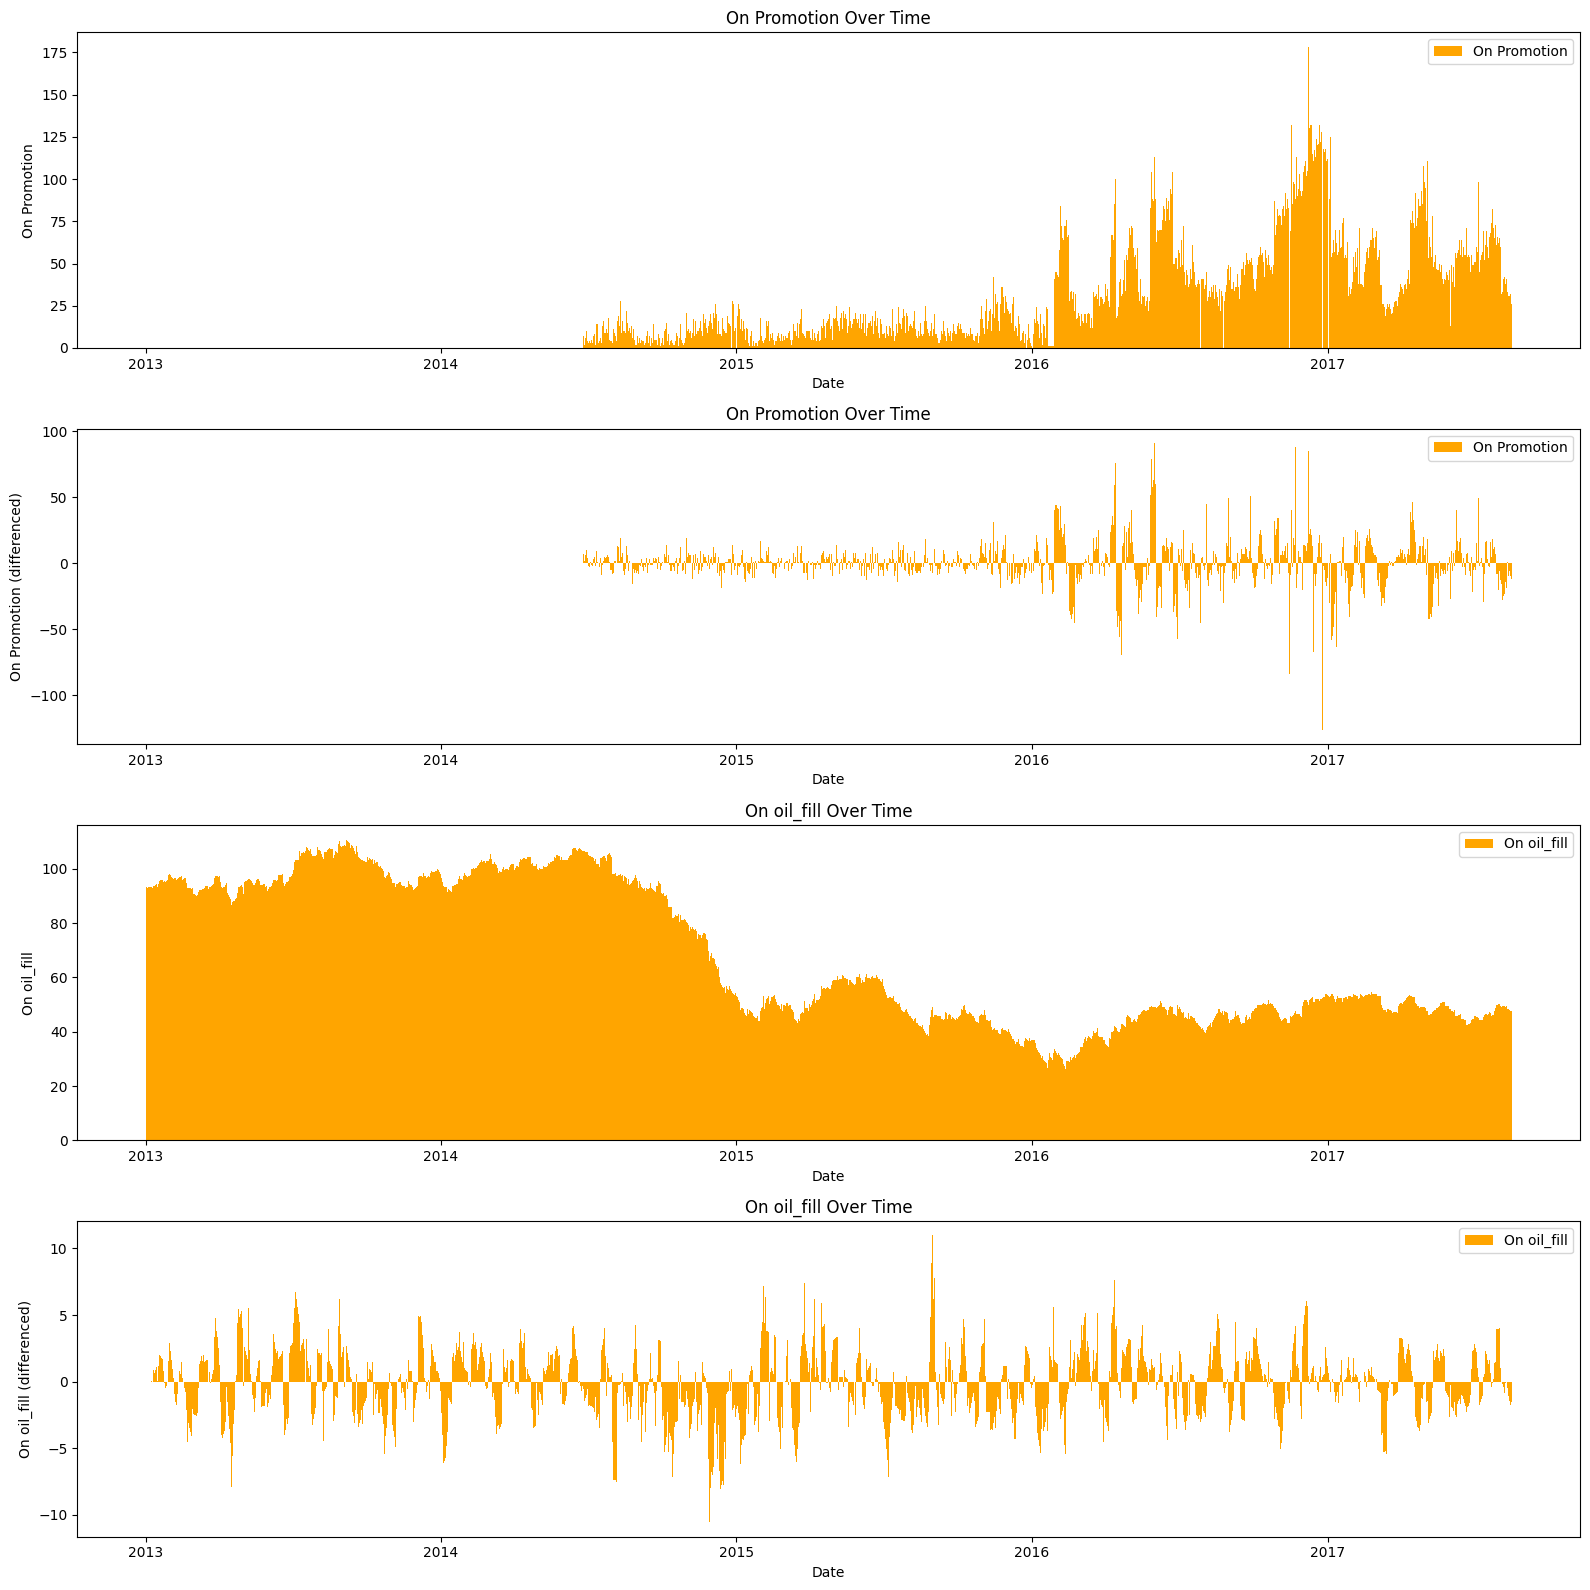

In [167]:
sales_df=sales_df.sort_values(by='date')
df = sales_df
# df=df[df['date']>=pd.to_datetime('2015-12-01')]
# df=df[df['date']<pd.to_datetime('2016-02-01')]


plt.figure(figsize=(16, 16))


plt.subplot(4, 1, 1)
plt.bar(df['date'], df['onpromotion'], color='orange', label='On Promotion', align='edge', width=1)
plt.xlabel('Date')
plt.ylabel('On Promotion')
plt.title('On Promotion Over Time')
plt.legend()

plt.subplot(4, 1, 2)
plt.bar(df['date'], df['onpromotion_differencing'], color='orange', label='On Promotion', align='edge', width=1)
plt.xlabel('Date')
plt.ylabel('On Promotion (differenced)')
plt.title('On Promotion Over Time')
plt.legend()


plt.subplot(4, 1, 3)
plt.bar(df['date'], df['oil_fill'], color='orange', label='On oil_fill', align='edge', width=1)
plt.xlabel('Date')
plt.ylabel('On oil_fill')
plt.title('On oil_fill Over Time')
plt.legend()

plt.subplot(4, 1, 4)
plt.bar(df['date'], df['oil_fill_differencing'], color='orange', label='On oil_fill', align='edge', width=1)
plt.xlabel('Date')
plt.ylabel('On oil_fill (differenced)')
plt.title('On oil_fill Over Time')
plt.legend()



plt.tight_layout()
plt.show()

In [168]:
sales_df

id       date     family   sales  onpromotion  dcoilwtico  \
0        1464 2013-01-01  GROCERY I     0.0            0         NaN   
1        3246 2013-01-02  GROCERY I  4558.0            0       93.14   
2        5028 2013-01-03  GROCERY I  3260.0            0       92.97   
3        6810 2013-01-04  GROCERY I  3085.0            0       93.12   
4        8592 2013-01-05  GROCERY I  3398.0            0         NaN   
...       ...        ...        ...     ...          ...         ...   
1683  2993442 2017-08-11  GROCERY I  2864.0           35       48.81   
1684  2995224 2017-08-12  GROCERY I  2476.0           31         NaN   
1685  2997006 2017-08-13  GROCERY I  3141.0           31         NaN   
1686  2998788 2017-08-14  GROCERY I  2717.0           32       47.59   
1687  3000570 2017-08-15  GROCERY I  2696.0           26       47.57   

       weekdays  week_of_the_year  year  month  day  isWeekend  isHoliday  \
0       Tuesday                 1  2013      1    1          0          1   
1     Wednesday                 1  2013      1    2          0          0   
2      Thursday                 1  2013      1    3          0          0   
3        Friday                 1  2013      1    4          0          0   
4      Saturday                 1  2013      1    5          1          0   
...         ...               ...   ...    ...  ...        ...        ...   
1683     Friday                32  2017      8   11          0          0   
1684   Saturday                32  2017      8   12          1          0   
1685     Sunday                32  2017      8   13          1          0   
1686     Monday                33  2017      8   14          0          0   
1687    Tuesday                33  2017      8   15          0          0   

       oil_fill  onpromotion_differencing  oil_fill_differencing  
0     93.140000                       0.0                   0.00  
1     93.140000                       0.0                   0.00  
2     92.970000                       0.0                   0.00  
3     93.120000                       0.0                   0.00  
4     93.146667                       0.0                   0.00  
...         ...                       ...                    ...  
1683  48.810000                       2.0                  -0.76  
1684  48.403333                     -10.0                  -1.10  
1685  47.996667                      -6.0                  -1.44  
1686  47.590000                     -10.0                  -1.78  
1687  47.570000                     -12.0                  -1.50  

[1688 rows x 16 columns]

In [169]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1688 entries, 0 to 1687
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        1688 non-null   int64         
 1   date                      1688 non-null   datetime64[ns]
 2   family                    1688 non-null   object        
 3   sales                     1688 non-null   float64       
 4   onpromotion               1688 non-null   int64         
 5   dcoilwtico                1163 non-null   float64       
 6   weekdays                  1688 non-null   object        
 7   week_of_the_year          1688 non-null   UInt32        
 8   year                      1688 non-null   int64         
 9   month                     1688 non-null   int64         
 10  day                       1688 non-null   int64         
 11  isWeekend                 1688 non-null   int32         
 12  isHoliday           

## Check Seasonality

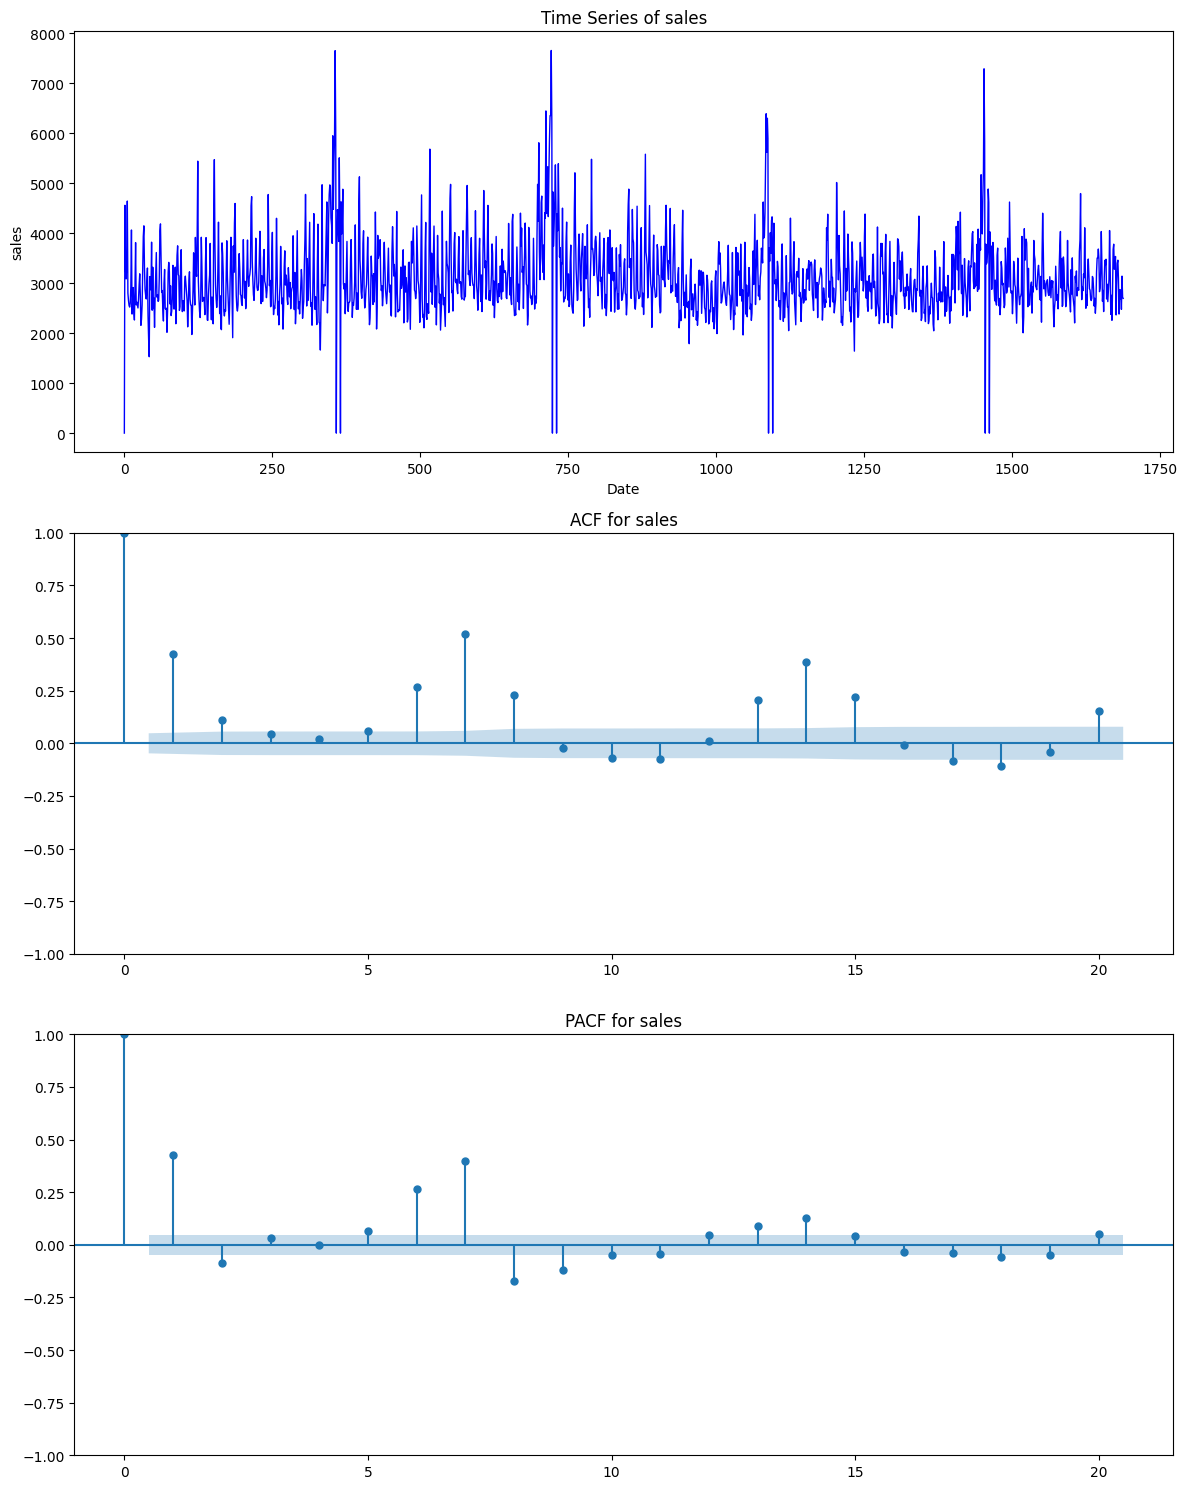

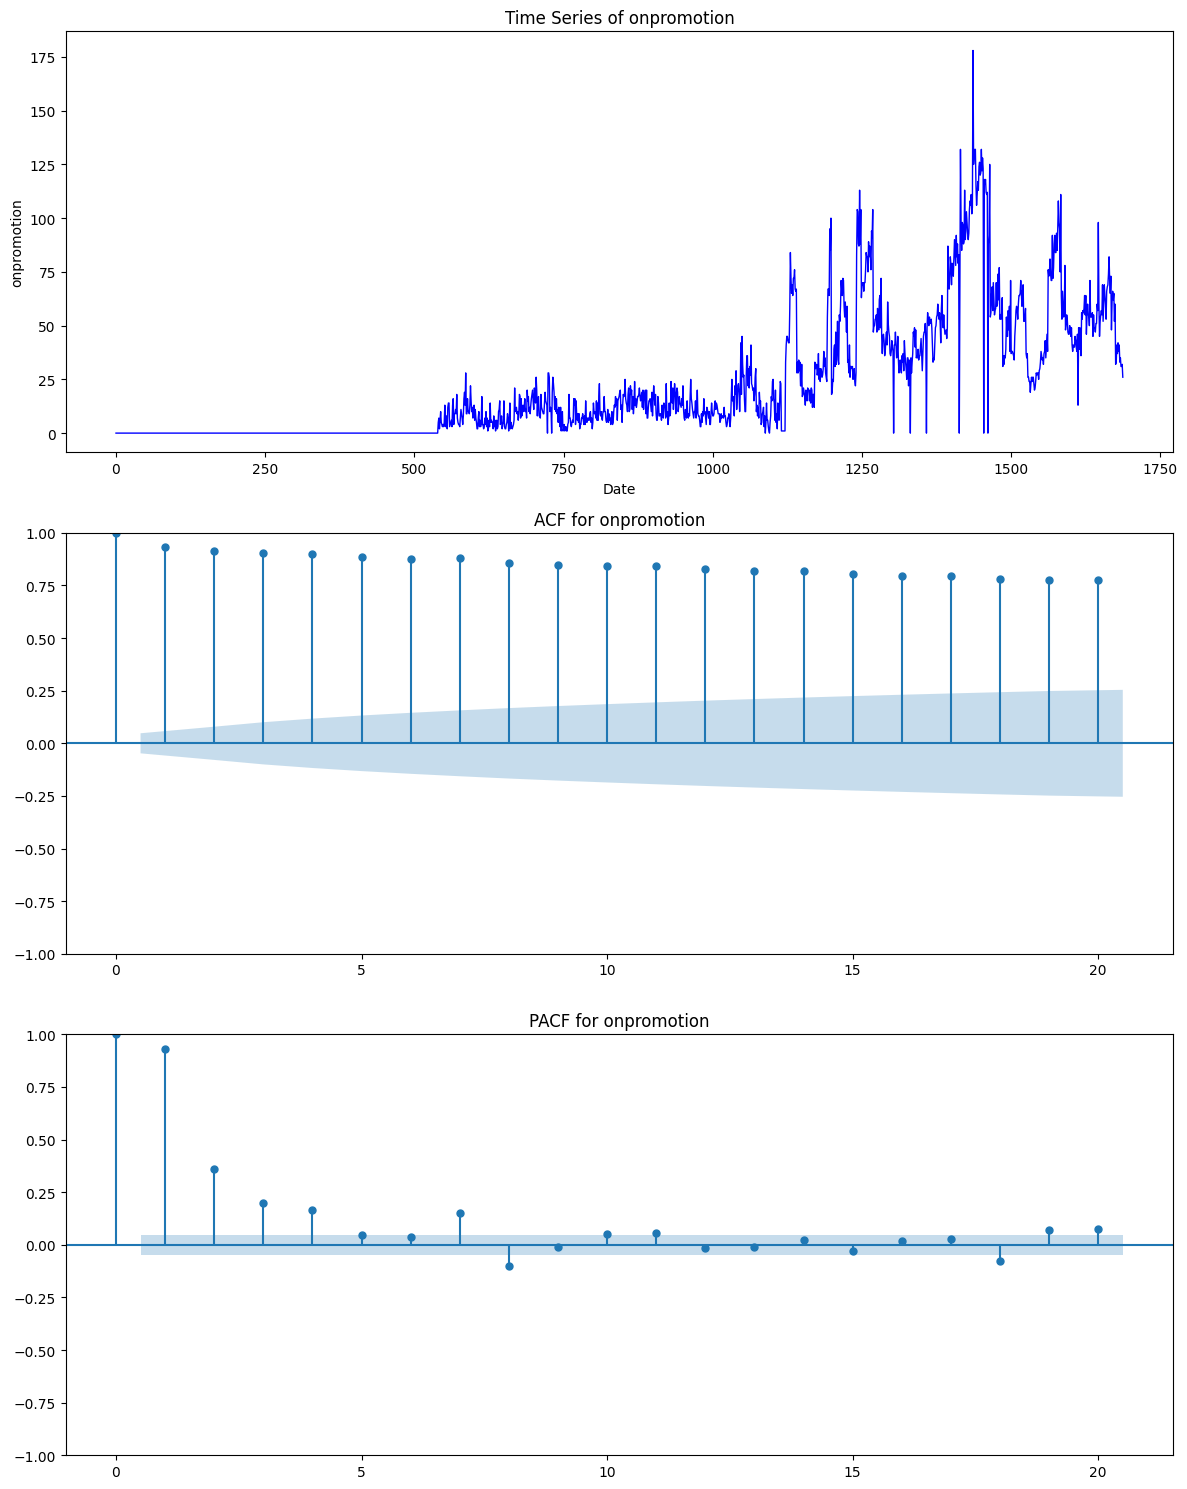

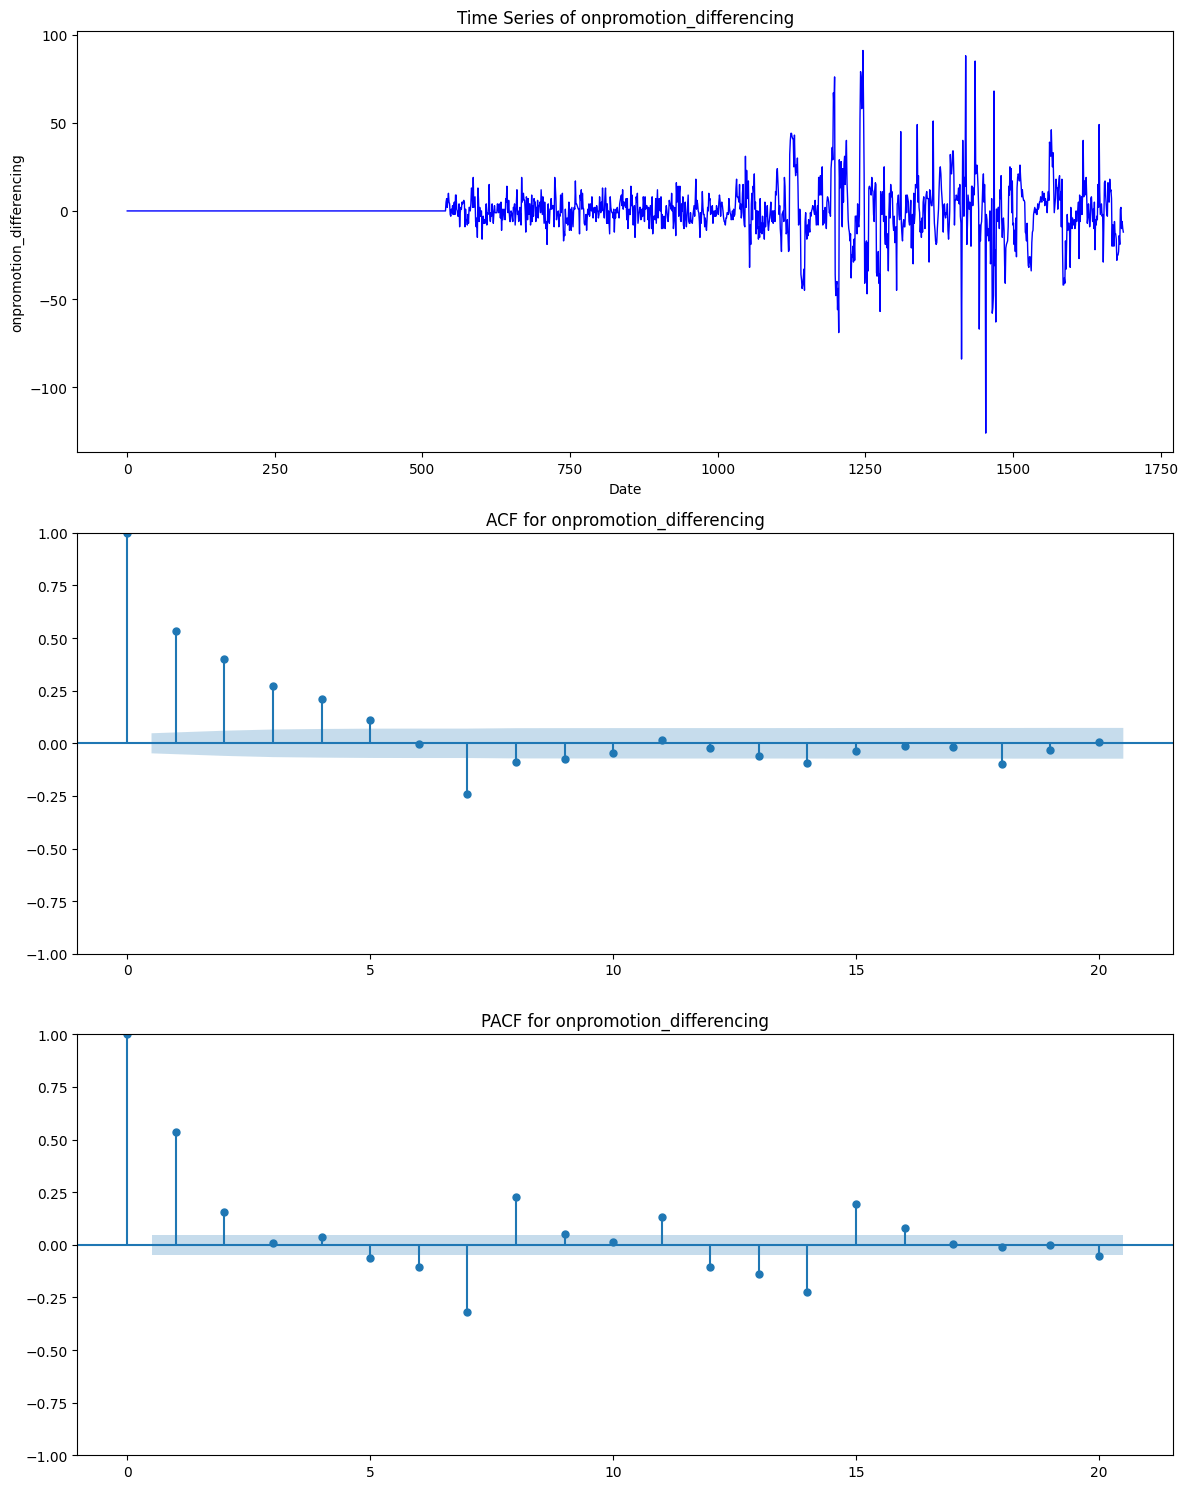

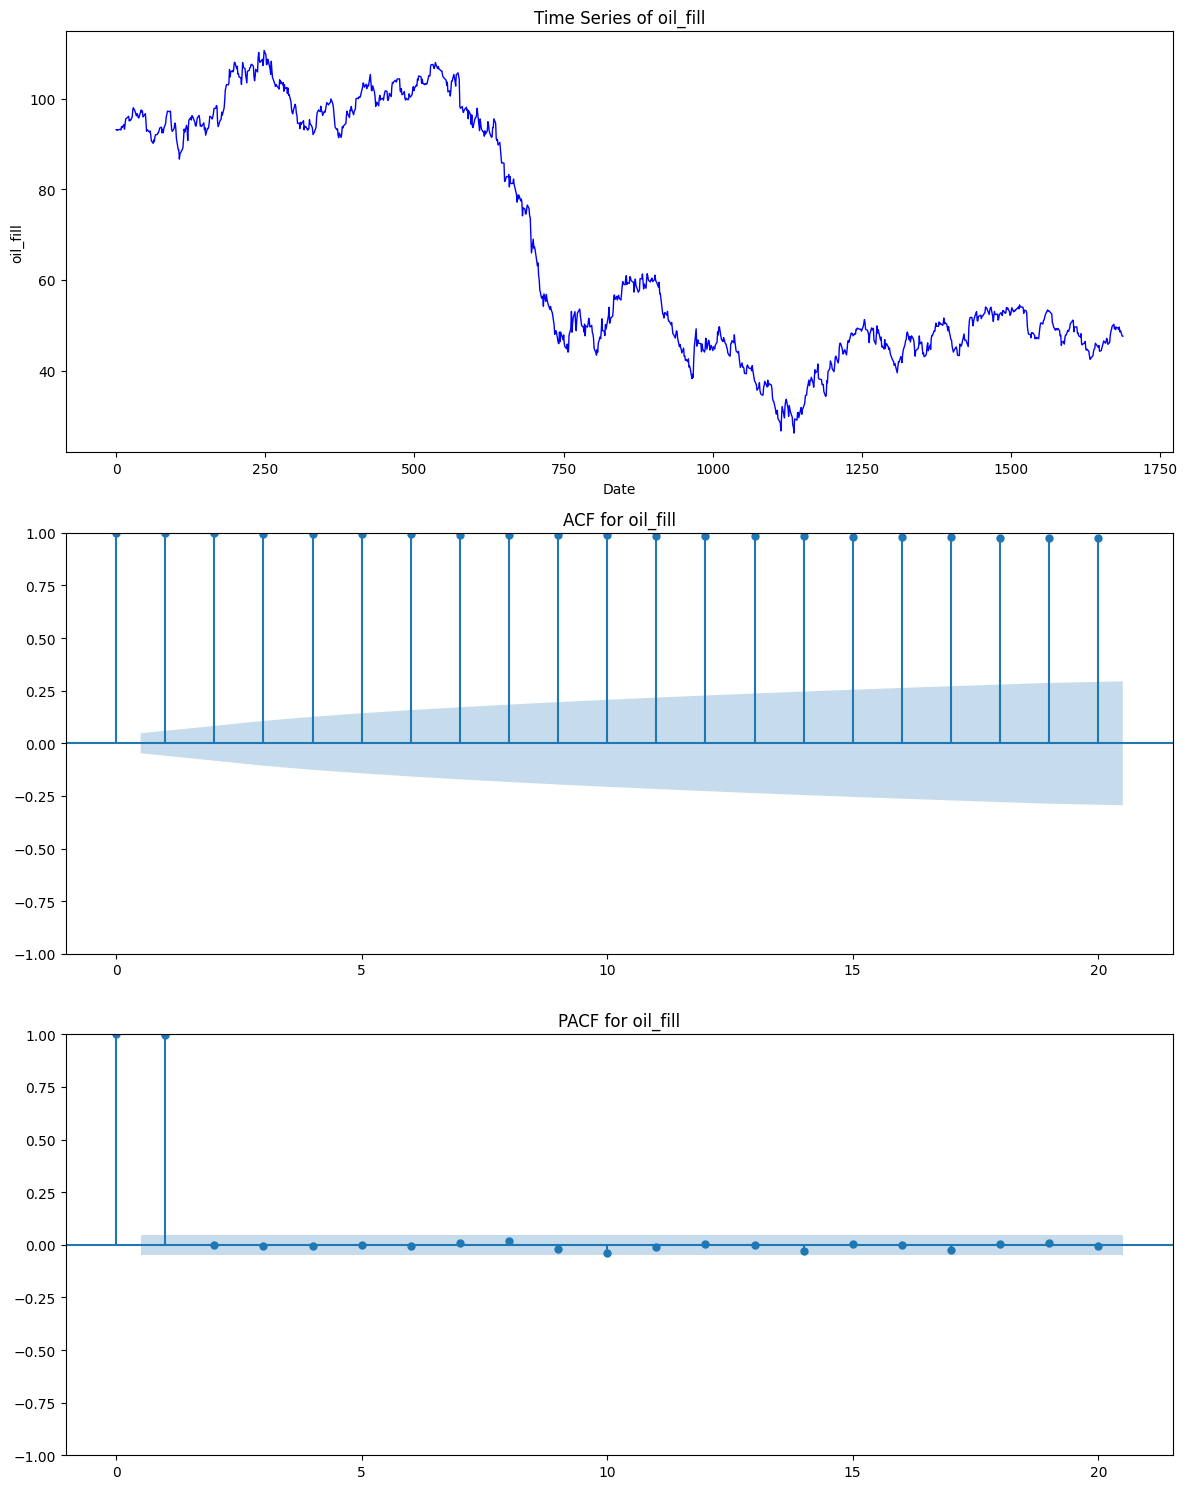

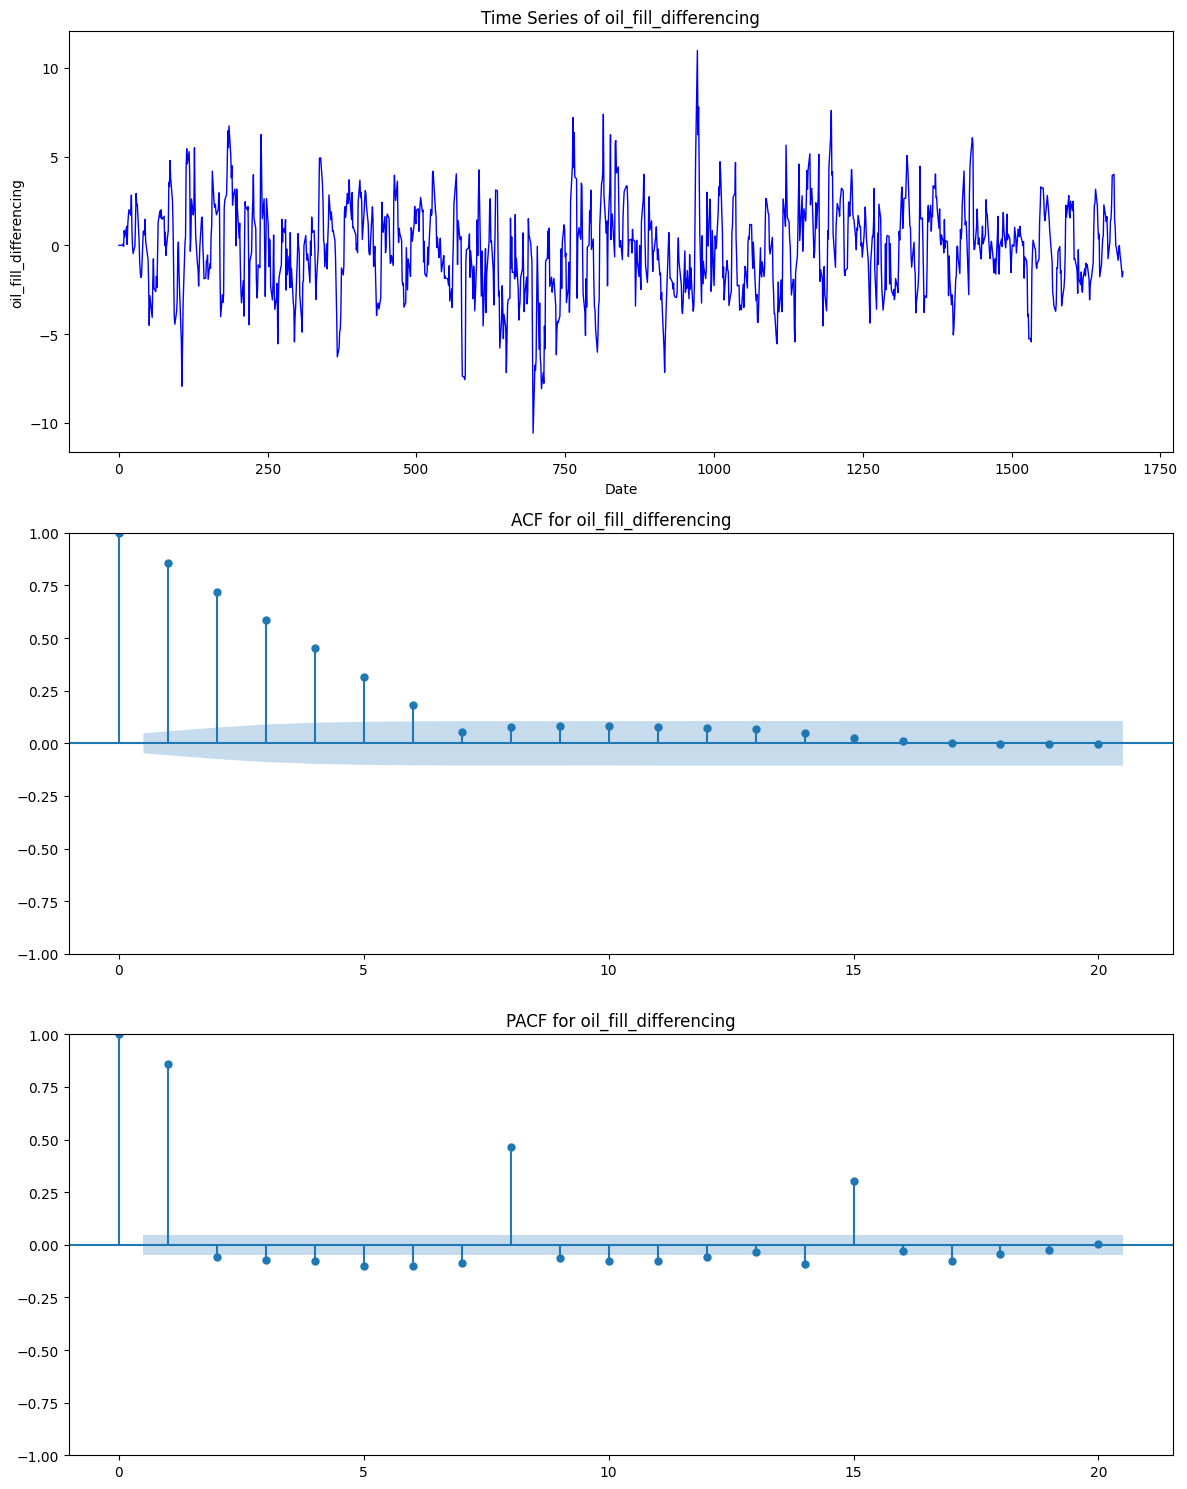

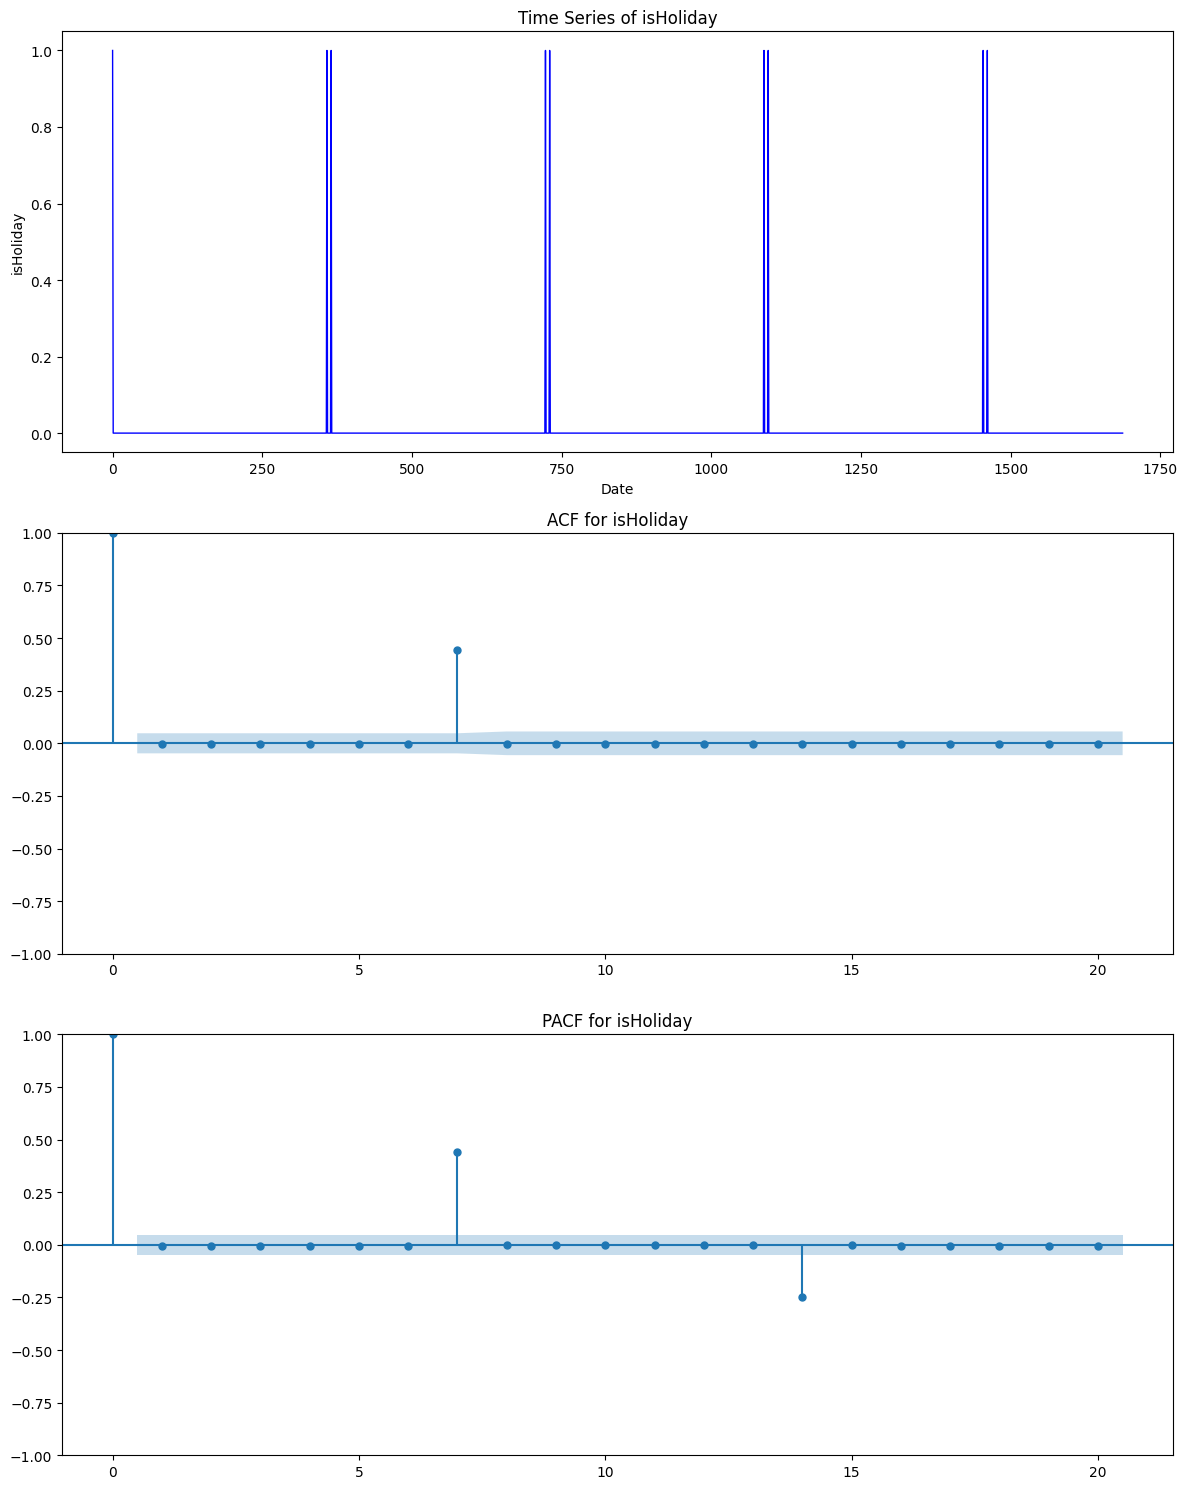

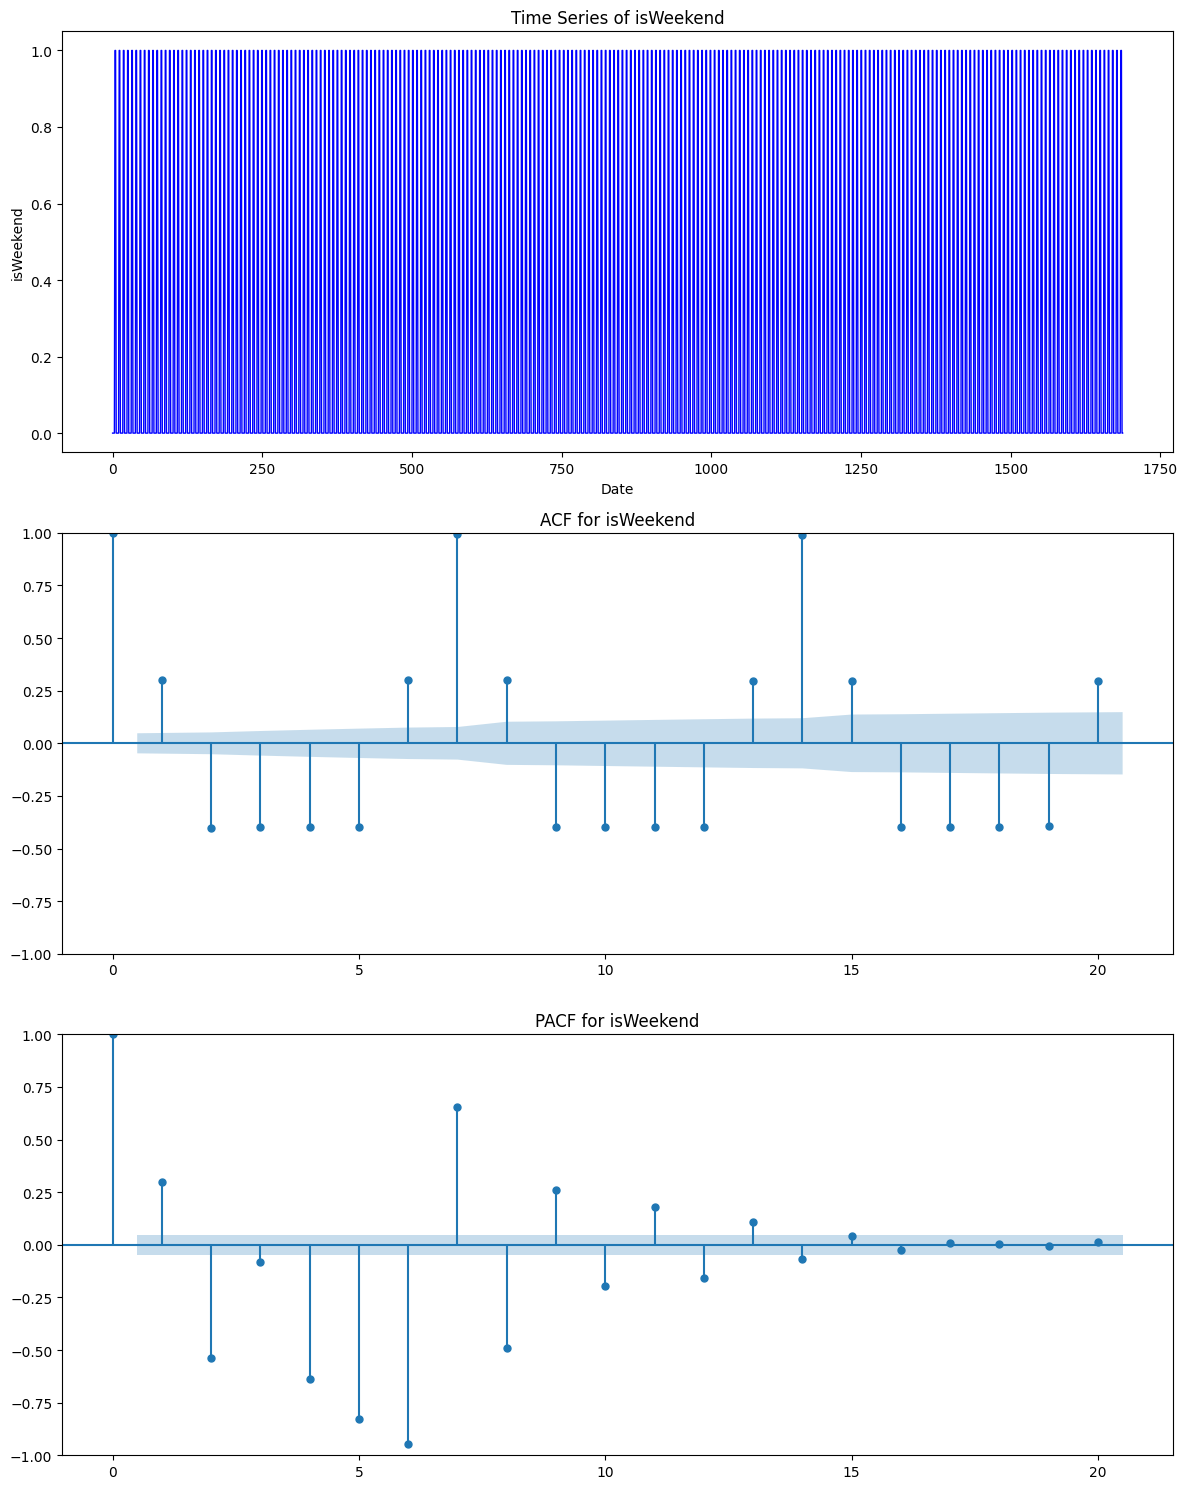

In [170]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

daftarFeature=['sales','onpromotion','onpromotion_differencing','oil_fill','oil_fill_differencing','isHoliday','isWeekend']
df = sales_df
lagsnya = 20

# df=df[df['date']>=pd.to_datetime('2015-12-01')]
# df=df[df['date']<pd.to_datetime('2016-02-01')]


for feature in daftarFeature : 

    fig, axes = plt.subplots(3, 1, figsize=(12, 15))


    axes[0].plot(df.index, df[feature], color='blue', linewidth=1)
    axes[0].set_title(f'Time Series of {feature}')
    axes[0].set_xlabel("Date")
    axes[0].set_ylabel(feature)

    plot_acf(df[feature], lags=lagsnya, ax=axes[1])
    axes[1].set_title(f'ACF for {feature}')


    plot_pacf(df[feature], lags=lagsnya, ax=axes[2])
    axes[2].set_title(f'PACF for {feature}')

    plt.tight_layout()  
    plt.show()


In [171]:
sales_df

id       date     family   sales  onpromotion  dcoilwtico  \
0        1464 2013-01-01  GROCERY I     0.0            0         NaN   
1        3246 2013-01-02  GROCERY I  4558.0            0       93.14   
2        5028 2013-01-03  GROCERY I  3260.0            0       92.97   
3        6810 2013-01-04  GROCERY I  3085.0            0       93.12   
4        8592 2013-01-05  GROCERY I  3398.0            0         NaN   
...       ...        ...        ...     ...          ...         ...   
1683  2993442 2017-08-11  GROCERY I  2864.0           35       48.81   
1684  2995224 2017-08-12  GROCERY I  2476.0           31         NaN   
1685  2997006 2017-08-13  GROCERY I  3141.0           31         NaN   
1686  2998788 2017-08-14  GROCERY I  2717.0           32       47.59   
1687  3000570 2017-08-15  GROCERY I  2696.0           26       47.57   

       weekdays  week_of_the_year  year  month  day  isWeekend  isHoliday  \
0       Tuesday                 1  2013      1    1          0          1   
1     Wednesday                 1  2013      1    2          0          0   
2      Thursday                 1  2013      1    3          0          0   
3        Friday                 1  2013      1    4          0          0   
4      Saturday                 1  2013      1    5          1          0   
...         ...               ...   ...    ...  ...        ...        ...   
1683     Friday                32  2017      8   11          0          0   
1684   Saturday                32  2017      8   12          1          0   
1685     Sunday                32  2017      8   13          1          0   
1686     Monday                33  2017      8   14          0          0   
1687    Tuesday                33  2017      8   15          0          0   

       oil_fill  onpromotion_differencing  oil_fill_differencing  
0     93.140000                       0.0                   0.00  
1     93.140000                       0.0                   0.00  
2     92.970000                       0.0                   0.00  
3     93.120000                       0.0                   0.00  
4     93.146667                       0.0                   0.00  
...         ...                       ...                    ...  
1683  48.810000                       2.0                  -0.76  
1684  48.403333                     -10.0                  -1.10  
1685  47.996667                      -6.0                  -1.44  
1686  47.590000                     -10.0                  -1.78  
1687  47.570000                     -12.0                  -1.50  

[1688 rows x 16 columns]

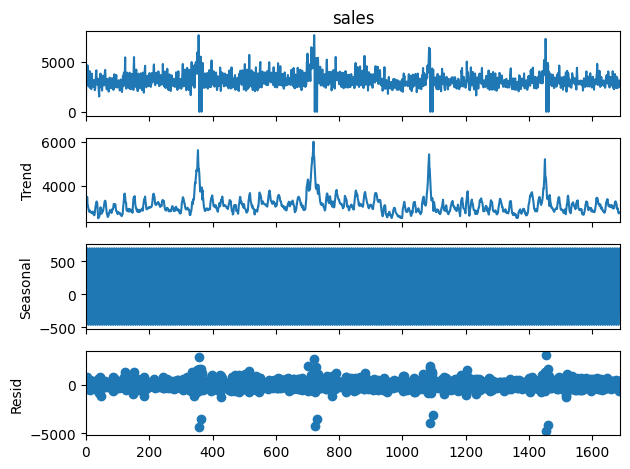

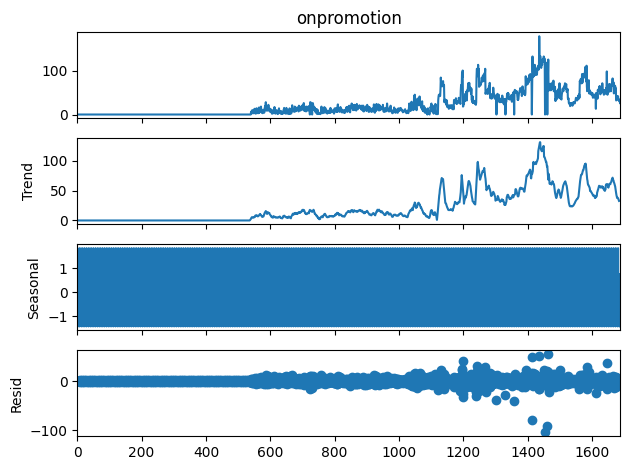

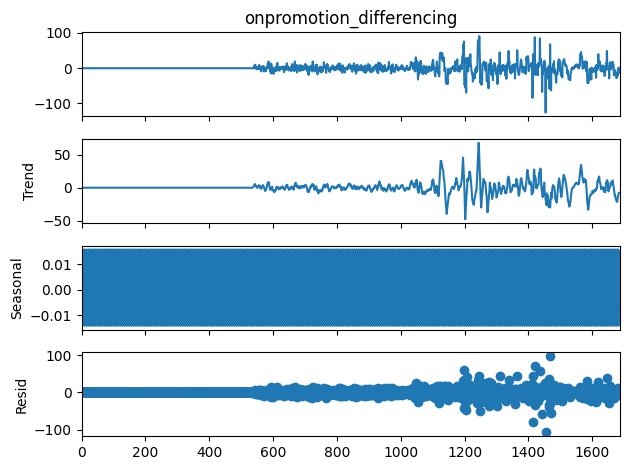

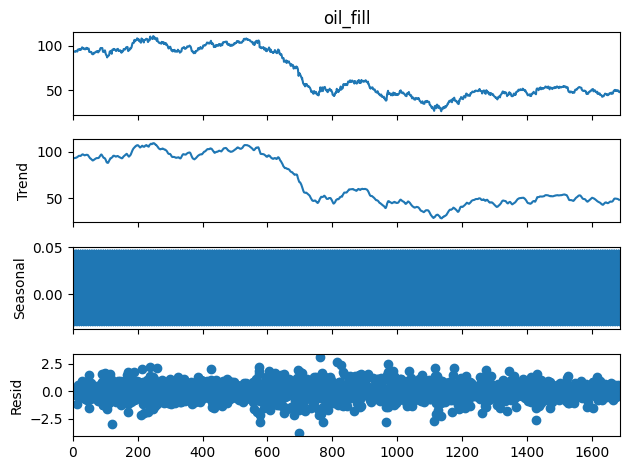

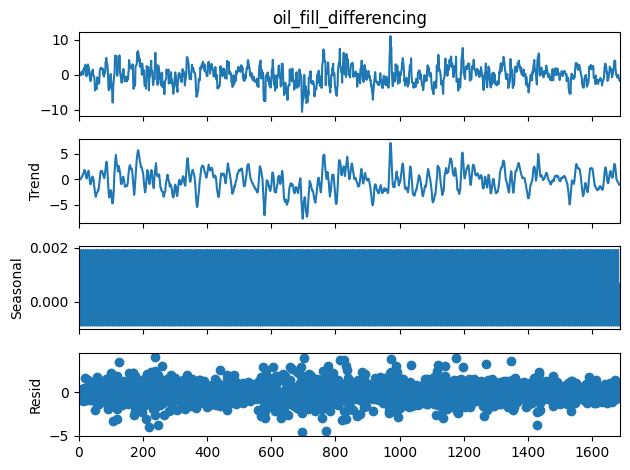

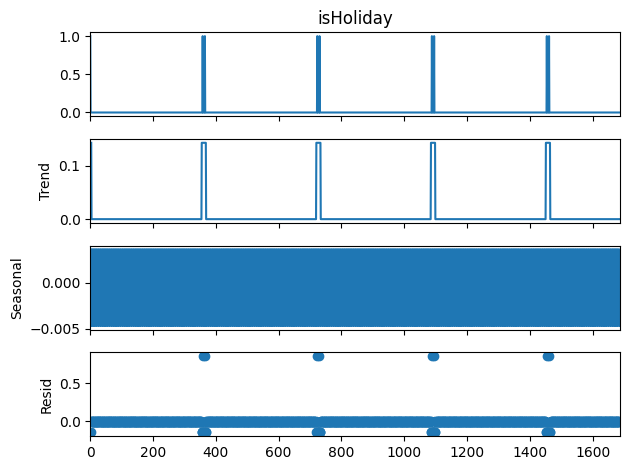

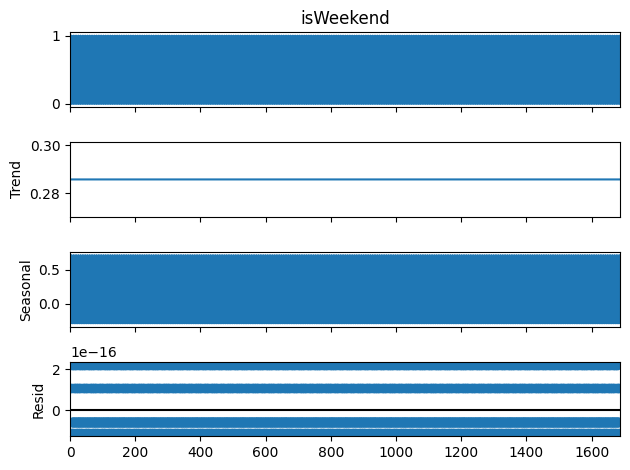

In [172]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

df = sales_df
# df=df[df['date']>=pd.to_datetime('2016-01-01')]
# df=df[df['date']<pd.to_datetime('2017-01-01')]

vPariodenya = 7

#karena seasonal_decompose tidak bisa handle missing value
#maka baris pertama untuk kolom on``
df['onpromotion_differencing'] = df['onpromotion_differencing'].fillna(method='bfill')
df['oil_fill_differencing'] = df['oil_fill_differencing'].fillna(method='bfill')

daftarFeature=['sales','onpromotion','onpromotion_differencing','oil_fill','oil_fill_differencing','isHoliday','isWeekend']

for feature in daftarFeature:

    # Decompose sales data (Assuming daily data, adjust period if needed)
    result = seasonal_decompose(df[feature], model='additive', period=vPariodenya  )

    # Plot decomposition
    result.plot()
    plt.show()

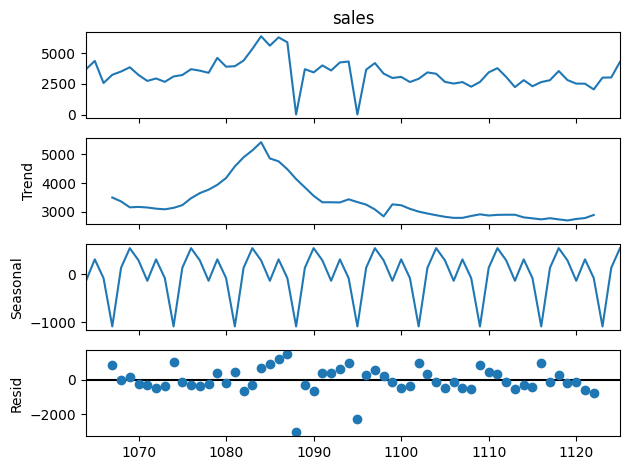

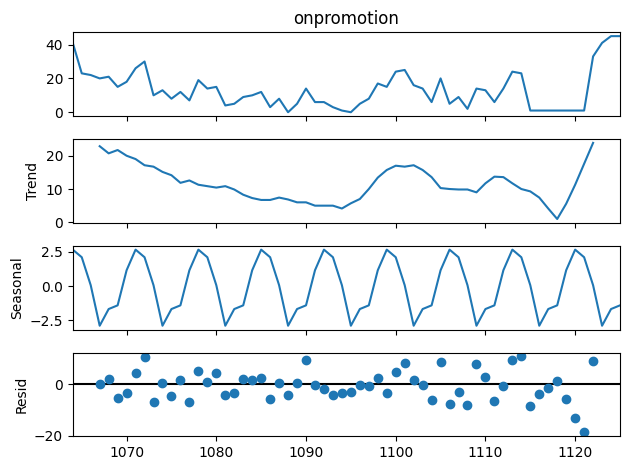

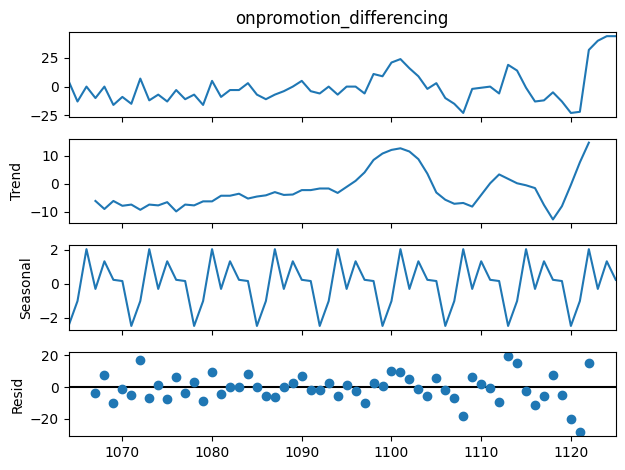

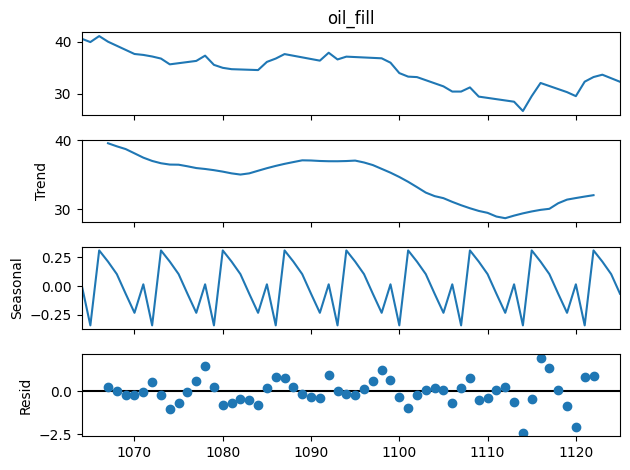

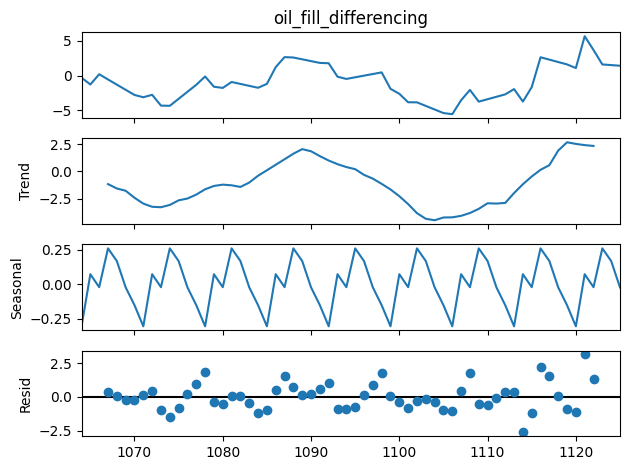

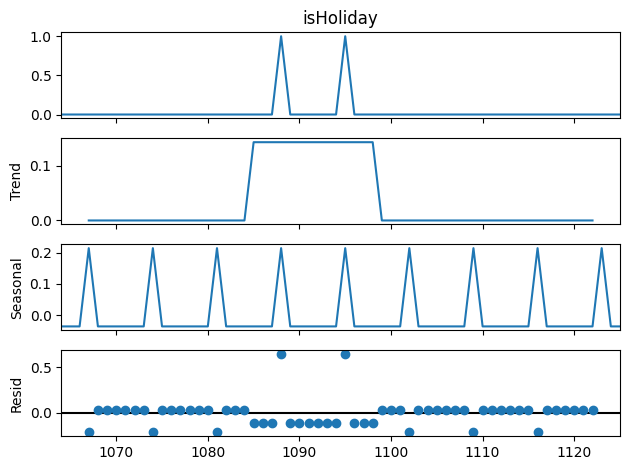

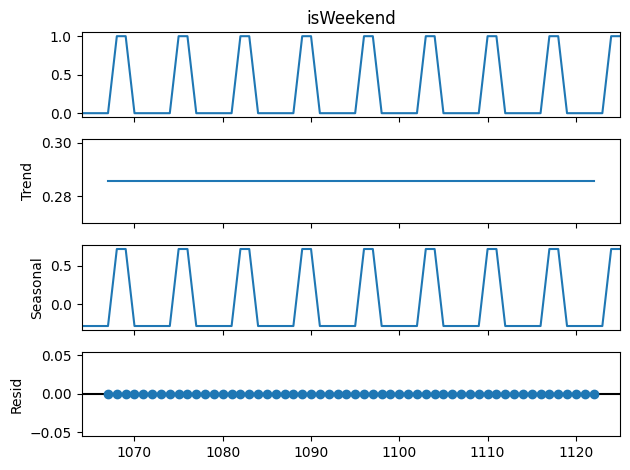

In [173]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

df = sales_df
df=df[df['date']>=pd.to_datetime('2015-12-01')]
df=df[df['date']<pd.to_datetime('2016-02-01')]

vPariodenya = 7

#karena seasonal_decompose tidak bisa handle missing value
#maka baris pertama untuk kolom on``
df['onpromotion_differencing'] = df['onpromotion_differencing'].fillna(method='bfill')
df['oil_fill_differencing'] = df['oil_fill_differencing'].fillna(method='bfill')

daftarFeature=['sales','onpromotion','onpromotion_differencing','oil_fill','oil_fill_differencing','isHoliday','isWeekend']

for feature in daftarFeature:

    # Decompose sales data (Assuming daily data, adjust period if needed)
    result = seasonal_decompose(df[feature], model='additive', period=vPariodenya  )

    # Plot decomposition
    result.plot()
    plt.show()

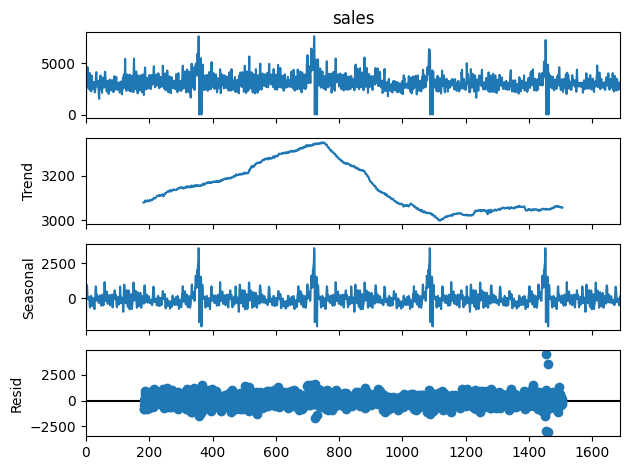

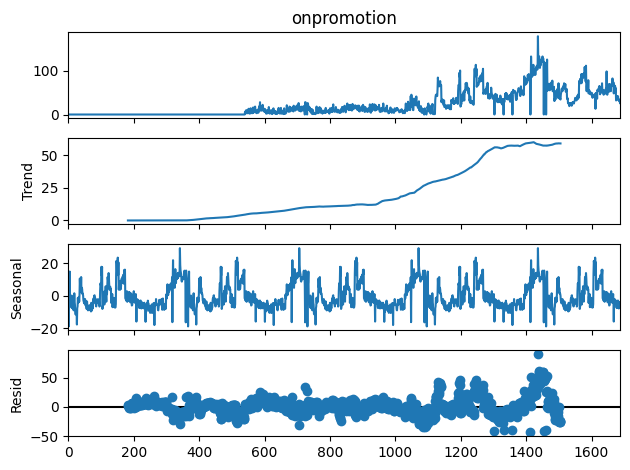

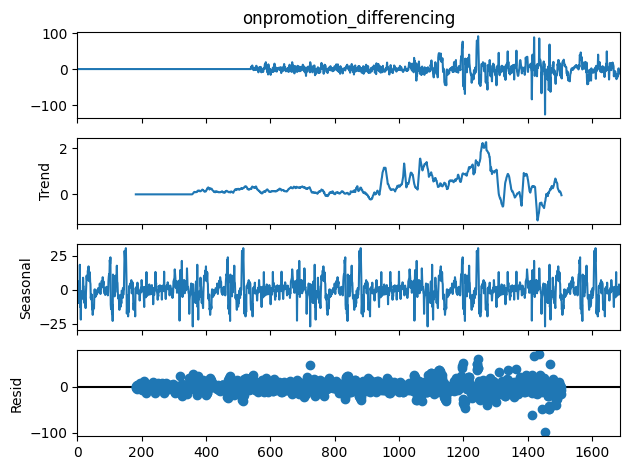

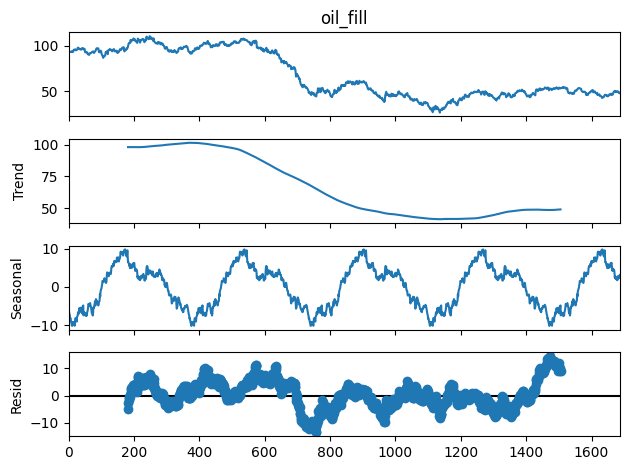

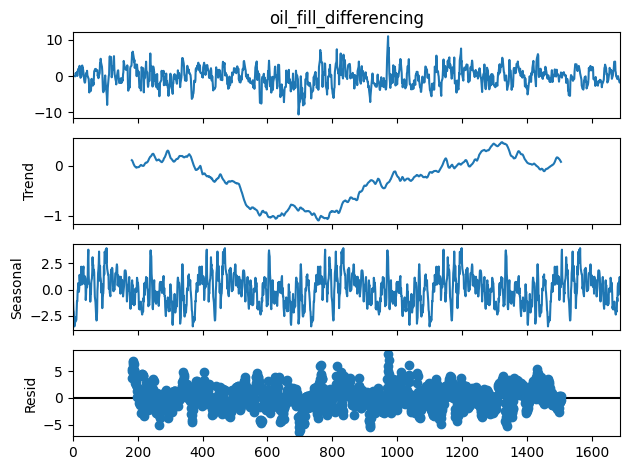

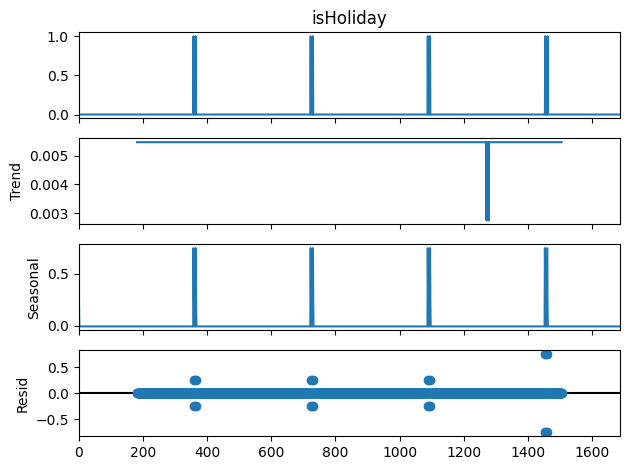

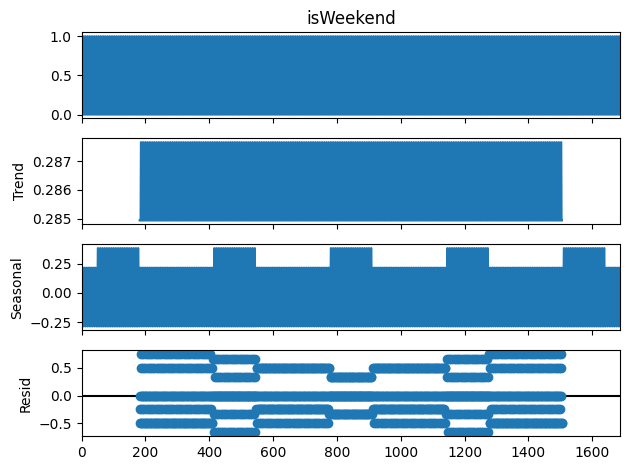

In [174]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

df = sales_df
# df=df[df['date']>=pd.to_datetime('2016-01-01')]
# df=df[df['date']<pd.to_datetime('2017-01-01')]

vPariodenya = 365

#karena seasonal_decompose tidak bisa handle missing value
#maka baris pertama untuk kolom on``
df['onpromotion_differencing'] = df['onpromotion_differencing'].fillna(method='bfill')
df['oil_fill_differencing'] = df['oil_fill_differencing'].fillna(method='bfill')

daftarFeature=['sales','onpromotion','onpromotion_differencing','oil_fill','oil_fill_differencing','isHoliday','isWeekend']

for feature in daftarFeature:

    # Decompose sales data (Assuming daily data, adjust period if needed)
    result = seasonal_decompose(df[feature], model='additive', period=vPariodenya  )

    # Plot decomposition
    result.plot()
    plt.show()




# Preparation for Modelling


In [175]:
print(sales_df.columns)
print(sales_df.head())

Index(['id', 'date', 'family', 'sales', 'onpromotion', 'dcoilwtico',
       'weekdays', 'week_of_the_year', 'year', 'month', 'day', 'isWeekend',
       'isHoliday', 'oil_fill', 'onpromotion_differencing',
       'oil_fill_differencing'],
      dtype='object')
     id       date     family   sales  onpromotion  dcoilwtico   weekdays  \
0  1464 2013-01-01  GROCERY I     0.0            0         NaN    Tuesday   
1  3246 2013-01-02  GROCERY I  4558.0            0       93.14  Wednesday   
2  5028 2013-01-03  GROCERY I  3260.0            0       92.97   Thursday   
3  6810 2013-01-04  GROCERY I  3085.0            0       93.12     Friday   
4  8592 2013-01-05  GROCERY I  3398.0            0         NaN   Saturday   

   week_of_the_year  year  month  day  isWeekend  isHoliday   oil_fill  \
0                 1  2013      1    1          0          1  93.140000   
1                 1  2013      1    2          0          0  93.140000   
2                 1  2013      1    3          0       

## copy sales_df -> data_df

In [176]:
data_df = sales_df[['date','sales', 'onpromotion_differencing','oil_fill_differencing', 'isWeekend','isHoliday']]
data_df

date   sales  onpromotion_differencing  oil_fill_differencing  \
0    2013-01-01     0.0                       0.0                   0.00   
1    2013-01-02  4558.0                       0.0                   0.00   
2    2013-01-03  3260.0                       0.0                   0.00   
3    2013-01-04  3085.0                       0.0                   0.00   
4    2013-01-05  3398.0                       0.0                   0.00   
...         ...     ...                       ...                    ...   
1683 2017-08-11  2864.0                       2.0                  -0.76   
1684 2017-08-12  2476.0                     -10.0                  -1.10   
1685 2017-08-13  3141.0                      -6.0                  -1.44   
1686 2017-08-14  2717.0                     -10.0                  -1.78   
1687 2017-08-15  2696.0                     -12.0                  -1.50   

      isWeekend  isHoliday  
0             0          1  
1             0          0  
2             0          0  
3             0          0  
4             1          0  
...         ...        ...  
1683          0          0  
1684          1          0  
1685          1          0  
1686          0          0  
1687          0          0  

[1688 rows x 6 columns]

In [177]:
duplicate_rows = data_df[data_df.duplicated()]
print(duplicate_rows)

data_df = data_df.drop_duplicates().reset_index(drop=True)
data_df


Empty DataFrame
Columns: [date, sales, onpromotion_differencing, oil_fill_differencing, isWeekend, isHoliday]
Index: []


date   sales  onpromotion_differencing  oil_fill_differencing  \
0    2013-01-01     0.0                       0.0                   0.00   
1    2013-01-02  4558.0                       0.0                   0.00   
2    2013-01-03  3260.0                       0.0                   0.00   
3    2013-01-04  3085.0                       0.0                   0.00   
4    2013-01-05  3398.0                       0.0                   0.00   
...         ...     ...                       ...                    ...   
1683 2017-08-11  2864.0                       2.0                  -0.76   
1684 2017-08-12  2476.0                     -10.0                  -1.10   
1685 2017-08-13  3141.0                      -6.0                  -1.44   
1686 2017-08-14  2717.0                     -10.0                  -1.78   
1687 2017-08-15  2696.0                     -12.0                  -1.50   

      isWeekend  isHoliday  
0             0          1  
1             0          0  
2             0          0  
3             0          0  
4             1          0  
...         ...        ...  
1683          0          0  
1684          1          0  
1685          1          0  
1686          0          0  
1687          0          0  

[1688 rows x 6 columns]

## Splitting Data

In [178]:
# splitting the data
percentage = 80
x = round((len(data_df)-1)*percentage/100)
data_df.loc[1350]

date                        2016-09-12 00:00:00
sales                                    2815.0
onpromotion_differencing                    1.0
oil_fill_differencing                     1.545
isWeekend                                     0
isHoliday                                     0
Name: 1350, dtype: object

In [179]:
original_train_data_df = sales_df[sales_df['date'] <= '2016-09-12']
original_val_data_df = sales_df[sales_df['date'] > '2016-09-12']

varmax_train_data_df = data_df[data_df['date'] <= '2016-09-12']
varmax_val_data_df = data_df[data_df['date'] > '2016-09-12']

print(f'tail varmax_train_data_df :\n {varmax_train_data_df.tail()}')
print(f'head varmax_val_data_df :\n {varmax_val_data_df.head()}')

tail varmax_train_data_df :
            date   sales  onpromotion_differencing  oil_fill_differencing  \
1346 2016-09-08  2253.0                      -4.0               4.460000   
1347 2016-09-09  2307.0                     -12.0               1.490000   
1348 2016-09-10  3048.0                       5.0               1.508333   
1349 2016-09-11  3341.0                       8.0               1.526667   
1350 2016-09-12  2815.0                       1.0               1.545000   

      isWeekend  isHoliday  
1346          0          0  
1347          0          0  
1348          1          0  
1349          1          0  
1350          0          0  
head varmax_val_data_df :
            date   sales  onpromotion_differencing  oil_fill_differencing  \
1351 2016-09-13  2396.0                     -10.0               0.060000   
1352 2016-09-14  2463.0                       3.0              -1.850000   
1353 2016-09-15  2231.0                       9.0              -3.780000   
1354 2016

In [180]:
print(varmax_train_data_df.dtypes)

date                        datetime64[ns]
sales                              float64
onpromotion_differencing           float64
oil_fill_differencing              float64
isWeekend                            int32
isHoliday                            int32
dtype: object


In [181]:
print(varmax_train_data_df.isna().sum())

date                        0
sales                       0
onpromotion_differencing    0
oil_fill_differencing       0
isWeekend                   0
isHoliday                   0
dtype: int64


### cell dibawah ini saya jadikan COMMENT 

agar tidak makan waktu banyak, hasil **model.fit()** sudah saya jadikan pickle file ; jadi tinggal di load di cell berikutnya

In [182]:
from statsmodels.tsa.statespace.varmax import VARMAX


# Define Endogenous (Variables to Predict)
endog_vars = ['sales', 'onpromotion_differencing']  # Targets
endog = varmax_train_data_df[endog_vars]

# Define Exogenous (Other Features)
exog_vars = ['oil_fill_differencing', 'isWeekend', 'isHoliday']  # Predictors
exog = varmax_train_data_df[exog_vars]

# Fit VARMAX Model
model = VARMAX(endog=endog, exog=exog, order=(7, 2))  
model_fit = model.fit()


# Print summary
print(model_fit.summary())


import pickle

# Save the trained model
with open('varmax_grocery_model_awal_sebelum_tuning.pkl', 'wb') as f:
    pickle.dump(model_fit, f)



c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     Statespace Model Results                                    
Dep. Variable:     ['sales', 'onpromotion_differencing']   No. Observations:                 1351
Model:                                       VARMAX(7,2)   Log Likelihood              -15193.323
                                             + intercept   AIC                          30480.647
Date:                                   Wed, 12 Feb 2025   BIC                          30725.451
Time:                                           20:46:10   HQIC                         30572.322
Sample:                                                0                                         
                                                  - 1351                                         
Covariance Type:                                     opg                                         
Ljung-Box (L1) (Q):             0.98, 6.22   Jarque-Bera (JB):    4343.17, 13797.86
Prob(Q):                        0.

In [183]:
import pickle

## Iterasi hyper parameter

### cell dibawah ini saya jadikan COMMENT kara hasilnya sudah di save jadi file pickle ; silahkan di uncomment jika ingin coba di run

In [184]:
'''

import itertools
import numpy as np
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_squared_error


p_values = [1,2,5,7]  # Endogenous lags
q_values = [1,2,5,7,30]  # Exogenous lags


endog_vars = ['sales', 'onpromotion_differencing']  # Targets
endog = varmax_train_data_df[endog_vars]


exog_vars = ['oil_fill_differencing', 'isWeekend', 'isHoliday']  
exog = varmax_train_data_df[exog_vars]

# Loop through all combinations of p and q
for p, q in itertools.product(p_values, q_values):
    print(f"Trying VARMAX({p}, {q})")
    
    # Create and fit the VARMAX model
    model = VARMAX(endog=endog, exog=exog, order=(p, q))
    model_fit = model.fit(disp=False)
    
    # Forecast for validation data
    forecast_steps = len(varmax_val_data_df)
    forecast = model_fit.forecast(steps=forecast_steps, exog=varmax_val_data_df[exog_vars])
    
    # Save the trained model
    filename = (f'varmax_grocery_model_p{p}_q{q}_.pkl')
    with open(filename, 'wb') as f:
        pickle.dump(model_fit, f)


'''

'\n\nimport itertools\nimport numpy as np\nfrom statsmodels.tsa.statespace.varmax import VARMAX\nfrom sklearn.metrics import mean_squared_error\n\n\np_values = [1,2,5,7]  # Endogenous lags\nq_values = [1,2,5,7,30]  # Exogenous lags\n\n\nendog_vars = [\'sales\', \'onpromotion_differencing\']  # Targets\nendog = varmax_train_data_df[endog_vars]\n\n\nexog_vars = [\'oil_fill_differencing\', \'isWeekend\', \'isHoliday\']  \nexog = varmax_train_data_df[exog_vars]\n\n# Loop through all combinations of p and q\nfor p, q in itertools.product(p_values, q_values):\n    print(f"Trying VARMAX({p}, {q})")\n    \n    # Create and fit the VARMAX model\n    model = VARMAX(endog=endog, exog=exog, order=(p, q))\n    model_fit = model.fit(disp=False)\n    \n    # Forecast for validation data\n    forecast_steps = len(varmax_val_data_df)\n    forecast = model_fit.forecast(steps=forecast_steps, exog=varmax_val_data_df[exog_vars])\n    \n    # Save the trained model\n    filename = (f\'varmax_grocery_model_p

In [185]:
import os
import glob

## trying All created models to find best model


In [191]:
from sklearn.metrics import mean_squared_error
import numpy as np

# daftarModel = ['varmax_grocery_model_awal_sebelum_tuning.pkl','varmax_grocery_model_p1_q1_.pkl',
#                'varmax_grocery_model_p1_q2_.pkl','varmax_grocery_model_p1_q5_.pkl','varmax_grocery_model_p1_q7_.pkl','varmax_grocery_model_p1_q30_.pkl',
#                'varmax_grocery_model_p2_q2_.pkl','varmax_grocery_model_p2_q5_.pkl','varmax_grocery_model_p2_q7_.pkl','varmax_grocery_model_p2_q30_.pkl',
#                'varmax_grocery_model_p5_q2_.pkl','varmax_grocery_model_p5_q5_.pkl','varmax_grocery_model_p5_q7_.pkl','varmax_grocery_model_p5_q30_.pkl',
#                'varmax_grocery_model_p7_q2_.pkl','varmax_grocery_model_p7_q5_.pkl','varmax_grocery_model_p7_q7_.pkl','varmax_grocery_model_p7_q30_.pkl',
#                'varmax_grocery_model_p30_q2_.pkl','varmax_grocery_model_p30_q5_.pkl','varmax_grocery_model_p30_q7_.pkl','varmax_grocery_model_p30_q30_.pkl'
#                ]

directory = r'D:\__DOWNLOADS\_AIForINDONESIA\Codes\git\learnWithAIforIndonesia\Sesi15_Project01'
pattern = os.path.join(directory, 'varmax_grocery_model*.pkl')
full_file_list = glob.glob(pattern)
daftarModel = [os.path.basename(file) for file in full_file_list]

endog_vars = ['sales', 'onpromotion_differencing']  
endog = varmax_train_data_df[endog_vars]


exog_vars = ['oil_fill_differencing', 'isWeekend', 'isHoliday']  
exog = varmax_train_data_df[exog_vars]

lastValueOf_originalOnPromotion = original_train_data_df['onpromotion'].tail(1).values[0]


results_coba_model = []


for namaFile in daftarModel :
    print(f"Loading Model {namaFile}")
    try:
        with open(namaFile, 'rb') as f:
            loaded_model = pickle.load(f)

        # lakukan forcasting
        forecast_steps = len(varmax_val_data_df)
        forecast = loaded_model.forecast(steps=forecast_steps, exog=varmax_val_data_df[exog_vars])
        
        # membalikkan nilai differncing ke nilai semul
        forecast['onpromotion'] = lastValueOf_originalOnPromotion + forecast['onpromotion_differencing'].cumsum()

        # ambil nilai actual dan rata2 actual untuk nanti menghitung RMSE
        actual_sales = varmax_val_data_df['sales']
        actual_onpromotion_differencing = varmax_val_data_df['onpromotion_differencing']
        actual_onpromotion = original_val_data_df['onpromotion']

        mean_actual_sales = varmax_val_data_df['sales'].mean()
        mean_actual_onpromotion_differencing = varmax_val_data_df['onpromotion_differencing'].mean()
        mean_actual_onpromotion = original_val_data_df['onpromotion'].mean()


        # ambil nilai hasil forcast
        forecast_sales = forecast['sales']
        forecast_onpromotion_differencing = forecast['onpromotion_differencing']
        forecast_onpromotion = forecast['onpromotion'] 

        # Hitung RMSE
        rmse_sales = np.sqrt(mean_squared_error(actual_sales, forecast_sales))
        rmse_onpromotion_differencing = np.sqrt(mean_squared_error(actual_onpromotion_differencing, forecast_onpromotion_differencing))
        rmse_onpromotion = np.sqrt(mean_squared_error(actual_onpromotion, forecast_onpromotion))

        # nilai rata2 dan pembobotan untuk RMSE 
        avg_rmse = (rmse_sales + rmse_onpromotion) / 2
        weighted_rmse = (rmse_sales/mean_actual_sales) + (rmse_onpromotion/mean_actual_onpromotion)

        # simpan hasilnya di variable results_coba_model
        results_coba_model.append((namaFile,weighted_rmse, avg_rmse, rmse_sales, rmse_onpromotion_differencing,rmse_onpromotion))

    except FileNotFoundError:
        print(f"Error: {namaFile} not found. Skipping this file.")
    except Exception as e:
        print(f"An unexpected error occurred while loading {namaFile}: {e}")


       

Loading Model varmax_grocery_model.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Loading Model varmax_grocery_model_awal_sebelum_tuning.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Loading Model varmax_grocery_model_p1_q1_.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Loading Model varmax_grocery_model_p1_q2_.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Loading Model varmax_grocery_model_p1_q30_.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Loading Model varmax_grocery_model_p1_q5_.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Loading Model varmax_grocery_model_p1_q7_.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generical

Loading Model varmax_grocery_model_p2_q1_.pkl
Loading Model varmax_grocery_model_p2_q2_.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Loading Model varmax_grocery_model_p2_q30_.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Loading Model varmax_grocery_model_p2_q5_.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Loading Model varmax_grocery_model_p2_q7_.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Loading Model varmax_grocery_model_p5_q1_.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Loading Model varmax_grocery_model_p5_q2_.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Loading Model varmax_grocery_model_p5_q30_.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Loading Model varmax_grocery_model_p5_q5_.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Loading Model varmax_grocery_model_p5_q7_.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Loading Model varmax_grocery_model_p7_q1_.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Loading Model varmax_grocery_model_p7_q2_.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Loading Model varmax_grocery_model_p7_q30_.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Loading Model varmax_grocery_model_p7_q5_.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Loading Model varmax_grocery_model_p7_q7_.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


In [192]:
# print(type(results_coba_model))

print('Nama model ,RMSE weighted,  RMSE rata-rata , RMSE Sales , RMSE onpromotion_differencing, RMSE onpromotion')
for baris in results_coba_model:
    print(baris)

Nama model ,RMSE weighted,  RMSE rata-rata , RMSE Sales , RMSE onpromotion_differencing, RMSE onpromotion
('varmax_grocery_model.pkl', 0.8314371197287034, 319.4991767412912, 600.0473859318834, 20.483792472275002, 38.95096755069904)
('varmax_grocery_model_awal_sebelum_tuning.pkl', 0.6586614191927805, 316.12341140096277, 603.9573189363848, 20.617951747817003, 28.289503865540777)
('varmax_grocery_model_p1_q1_.pkl', 1.1296958316773162, 334.5820542113466, 612.1855629533862, 20.529798807095666, 56.97854546930693)
('varmax_grocery_model_p1_q2_.pkl', 1.1031450129377232, 333.8247889781873, 612.2996862782454, 20.547878191627518, 55.34989167812925)
('varmax_grocery_model_p1_q30_.pkl', 1.9081424763860382, 357.5715663063566, 610.4459597066824, 20.61410646624705, 104.6971729060308)
('varmax_grocery_model_p1_q5_.pkl', 0.9464833321891403, 328.5601313559645, 611.3477079590442, 20.54452790238563, 45.77255475288479)
('varmax_grocery_model_p1_q7_.pkl', 7.393416862607144, 540.1290098034156, 640.15234098977

In [193]:
# best model yg nilainya terendah
fileName, best_weighted_rmse, best_avg_rmse, best_rmse_sales, best_rmse_onpromotion_differencing, best_rmse_onpromotion = min(results_coba_model, key=lambda x: x[1])

print(f"Best Model: {fileName} with Weighted RMSE: {best_weighted_rmse}")
print(f"  RMSE for Sales: {best_rmse_sales}")
print(f"  RMSE for onpromotion: {best_rmse_sales}")
print(f"  RMSE for onpromotion_differencing: {best_rmse_onpromotion_differencing}")


Best Model: varmax_grocery_model_awal_sebelum_tuning.pkl with Weighted RMSE: 0.6586614191927805
  RMSE for Sales: 603.9573189363848
  RMSE for onpromotion: 603.9573189363848
  RMSE for onpromotion_differencing: 20.617951747817003


dari Grid Search , ternyata yg terbaik adalah model yang pertama (varmax_model_awal_sebelum_tuning.pkl)

In [194]:
#varmax_model_p7_q2_.pkl
with open('varmax_grocery_model_p7_q2_.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

print(loaded_model.summary())


                                     Statespace Model Results                                    
Dep. Variable:     ['sales', 'onpromotion_differencing']   No. Observations:                 1351
Model:                                       VARMAX(7,2)   Log Likelihood              -15193.323
                                             + intercept   AIC                          30480.647
Date:                                   Wed, 12 Feb 2025   BIC                          30725.451
Time:                                           20:49:48   HQIC                         30572.322
Sample:                                                0                                         
                                                  - 1351                                         
Covariance Type:                                     opg                                         
Ljung-Box (L1) (Q):             0.98, 6.22   Jarque-Bera (JB):    4343.17, 13797.86
Prob(Q):                        0.

In [195]:
forecast_steps = len(varmax_val_data_df)  # Example: Forecasting 7 steps ahead
forecast = loaded_model.forecast(steps=forecast_steps, exog=varmax_val_data_df[exog_vars])
print(forecast)

            sales  onpromotion_differencing
1351  2723.138113                  3.067428
1352  2748.870693                  6.558862
1353  2551.770698                  4.666397
1354  2503.021813                  8.967771
1355  3097.385049                  2.160507
...           ...                       ...
1683  2876.849528                 -0.482883
1684  3215.658979                 -0.321660
1685  3346.090558                 -0.111740
1686  3061.135312                 -0.031979
1687  2918.677872                 -0.153034

[337 rows x 2 columns]


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


In [196]:
varmax_train_data_df

date   sales  onpromotion_differencing  oil_fill_differencing  \
0    2013-01-01     0.0                       0.0               0.000000   
1    2013-01-02  4558.0                       0.0               0.000000   
2    2013-01-03  3260.0                       0.0               0.000000   
3    2013-01-04  3085.0                       0.0               0.000000   
4    2013-01-05  3398.0                       0.0               0.000000   
...         ...     ...                       ...                    ...   
1346 2016-09-08  2253.0                      -4.0               4.460000   
1347 2016-09-09  2307.0                     -12.0               1.490000   
1348 2016-09-10  3048.0                       5.0               1.508333   
1349 2016-09-11  3341.0                       8.0               1.526667   
1350 2016-09-12  2815.0                       1.0               1.545000   

      isWeekend  isHoliday  
0             0          1  
1             0          0  
2             0          0  
3             0          0  
4             1          0  
...         ...        ...  
1346          0          0  
1347          0          0  
1348          1          0  
1349          1          0  
1350          0          0  

[1351 rows x 6 columns]

In [197]:
varmax_train_data_df

date   sales  onpromotion_differencing  oil_fill_differencing  \
0    2013-01-01     0.0                       0.0               0.000000   
1    2013-01-02  4558.0                       0.0               0.000000   
2    2013-01-03  3260.0                       0.0               0.000000   
3    2013-01-04  3085.0                       0.0               0.000000   
4    2013-01-05  3398.0                       0.0               0.000000   
...         ...     ...                       ...                    ...   
1346 2016-09-08  2253.0                      -4.0               4.460000   
1347 2016-09-09  2307.0                     -12.0               1.490000   
1348 2016-09-10  3048.0                       5.0               1.508333   
1349 2016-09-11  3341.0                       8.0               1.526667   
1350 2016-09-12  2815.0                       1.0               1.545000   

      isWeekend  isHoliday  
0             0          1  
1             0          0  
2             0          0  
3             0          0  
4             1          0  
...         ...        ...  
1346          0          0  
1347          0          0  
1348          1          0  
1349          1          0  
1350          0          0  

[1351 rows x 6 columns]

In [198]:
original_train_data_df = sales_df[sales_df['date'] <= '2016-09-12']
original_val_data_df = sales_df[sales_df['date'] > '2016-09-12']

lastValueOf_originalOnPromotion = original_train_data_df['onpromotion'].tail(1).values[0]
forecast['onpromotion'] = lastValueOf_originalOnPromotion + forecast['onpromotion_differencing'].cumsum()
forecast

sales  onpromotion_differencing  onpromotion
1351  2723.138113                  3.067428    39.067428
1352  2748.870693                  6.558862    45.626290
1353  2551.770698                  4.666397    50.292688
1354  2503.021813                  8.967771    59.260459
1355  3097.385049                  2.160507    61.420965
...           ...                       ...          ...
1683  2876.849528                 -0.482883    68.939005
1684  3215.658979                 -0.321660    68.617345
1685  3346.090558                 -0.111740    68.505605
1686  3061.135312                 -0.031979    68.473625
1687  2918.677872                 -0.153034    68.320592

[337 rows x 3 columns]

RMSE: 20.617951747817003


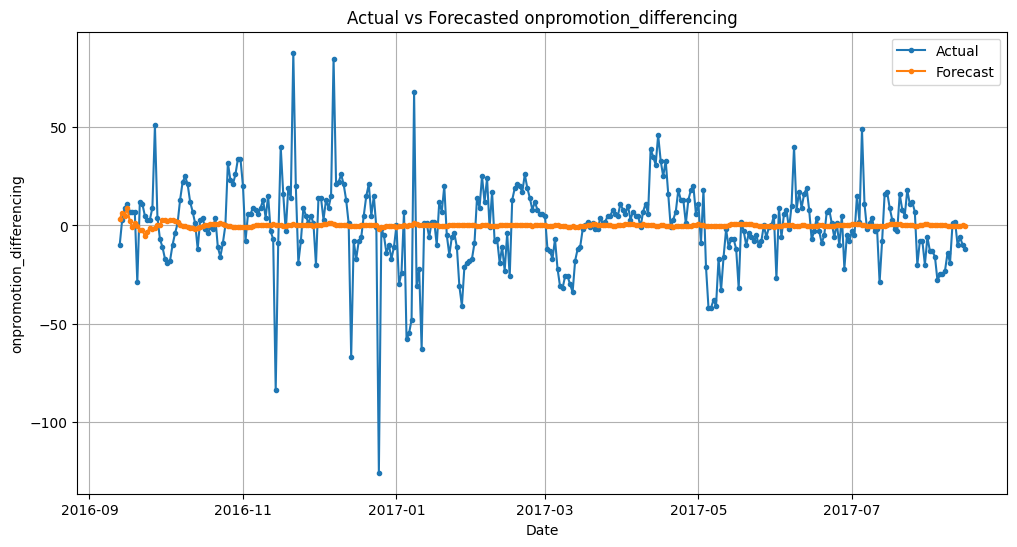

In [199]:
from sklearn.metrics import mean_squared_error


#actual value
actual_values = varmax_val_data_df['onpromotion_differencing']  

#forecast value
forecast_values = forecast['onpromotion_differencing']

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, forecast_values))
print(f"RMSE: {rmse}")


# Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(varmax_val_data_df['date'], actual_values, label='Actual', marker='.')
plt.plot(varmax_val_data_df['date'], forecast_values, label='Forecast', marker='.')
plt.xlabel('Date')
plt.ylabel('onpromotion_differencing')
plt.title('Actual vs Forecasted onpromotion_differencing')
plt.legend()
plt.grid(True)
plt.show()

RMSE: 28.289503865540777


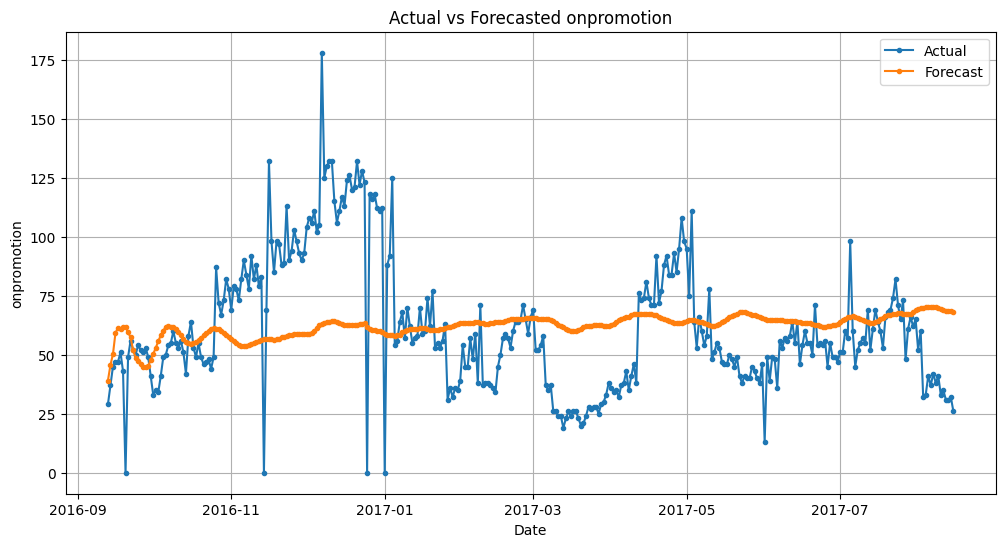

In [200]:
from sklearn.metrics import mean_squared_error


#Actual Value
actual_values = original_val_data_df['onpromotion']  # Adjust as per your data

#Forecast Value
forecast_values = forecast['onpromotion']

# Calculate RMSE
varmax_rmse_onpromotion = np.sqrt(mean_squared_error(actual_values, forecast_values))
print(f"RMSE: {varmax_rmse_onpromotion}")


# Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(original_val_data_df['date'], actual_values, label='Actual', marker='.')
plt.plot(varmax_val_data_df['date'], forecast_values, label='Forecast', marker='.')
plt.xlabel('Date')
plt.ylabel('onpromotion')
plt.title('Actual vs Forecasted onpromotion')
plt.legend()
plt.grid(True)
plt.show()

RMSE: 603.9573189363848


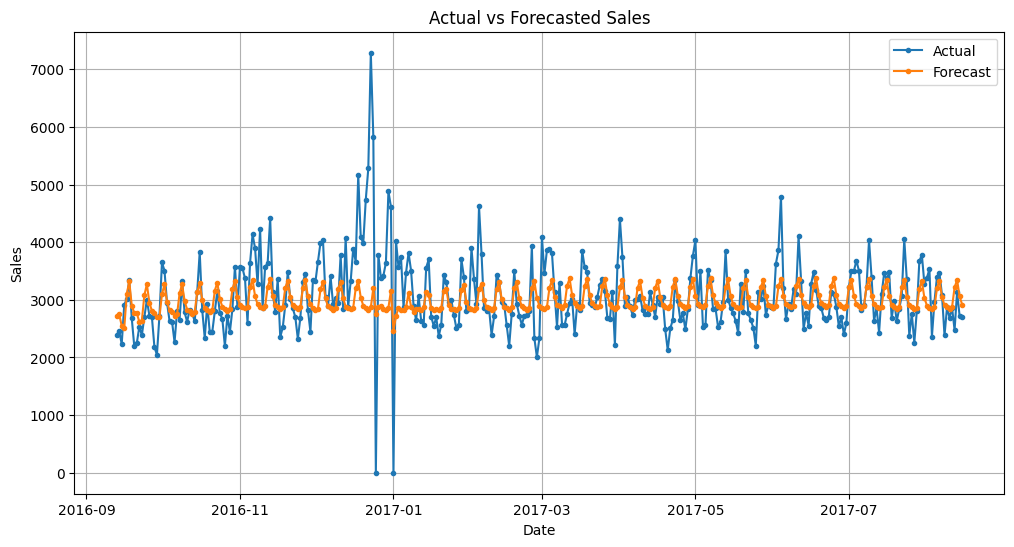

In [201]:
from sklearn.metrics import mean_squared_error


#Actual Value
actual_values = varmax_val_data_df['sales']  # Adjust as per your data

#Forecast Value
forecast_values = forecast['sales']

# Calculate RMSE
varmax_rmse_sales = np.sqrt(mean_squared_error(actual_values, forecast_values))
print(f"RMSE: {varmax_rmse_sales}")


# Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(varmax_val_data_df['date'], actual_values, label='Actual', marker='.')
plt.plot(varmax_val_data_df['date'], forecast_values, label='Forecast', marker='.')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Forecasted Sales')
plt.legend()
plt.grid(True)
plt.show()



# Modelling menggunakan LSTM

In [202]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import time
from sklearn.metrics import mean_squared_error


from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## splitting data train dan test

In [203]:
original_train_data_df = sales_df[sales_df['date'] <= '2016-09-12']
print(f'original_train_data_df shape = {original_train_data_df.shape}')
original_test_data_df = sales_df[sales_df['date'] > '2016-09-12']
print(f'original_test_data_df shape = {original_test_data_df.shape}')

#ambil kolom yang diperlukan saja
lstm_train_data_df=original_train_data_df.copy(deep=True)[['id','date','sales','onpromotion','oil_fill','isWeekend','isHoliday']]
lstm_test_data_df= original_test_data_df.copy(deep=True)[['id','date','sales','onpromotion','oil_fill','isWeekend','isHoliday']]
lstm_train_data_date_only_df=original_train_data_df.copy(deep=True)[['date']]
lstm_test_data_date_only_df= original_test_data_df.copy(deep=True)[['date']]


lstm_train_endog_df =lstm_train_data_df[['sales','onpromotion']]
lstm_train_exog_df = lstm_train_data_df[['oil_fill']]
#untuk data yg category tidak perlu di scaling nantinya
lstm_train_exog_cat_df =lstm_train_data_df[['isWeekend','isHoliday']]

lstm_test_endog_df = lstm_test_data_df[['sales','onpromotion']]
lstm_test_exog_df = lstm_test_data_df[['oil_fill']]
#untuk data yg category tidak perlu di scaling nantinya
lstm_test_exog_cat_df =lstm_test_data_df[['isWeekend','isHoliday']]



original_train_data_df shape = (1351, 16)
original_test_data_df shape = (337, 16)


## scaling data train dan test 

In [204]:
endog_scaler = MinMaxScaler(feature_range=(0, 1))
exog_scaler = MinMaxScaler(feature_range=(0, 1))

lstm_train_endog_df_scaled = lstm_train_endog_df.copy(deep=True) 
lstm_train_exog_df_scaled =lstm_train_exog_df.copy(deep=True)
lstm_test_endog_df_scaled =lstm_test_endog_df.copy(deep=True)
lstm_test_exog_df_scaled =lstm_test_exog_df.copy(deep=True)

#fitting scaler hanya pada data training (menghindari data leakage)
endog_scaler = endog_scaler.fit(lstm_train_endog_df_scaled[['sales','onpromotion']])
exog_scaler = exog_scaler.fit(lstm_train_exog_df_scaled[['oil_fill']])

#scaling kemudian dijakdikan dataframe lagi 
lstm_train_endog_df_scaled=endog_scaler.transform(lstm_train_endog_df_scaled)
lstm_train_endog_df_scaled=pd.DataFrame(lstm_train_endog_df_scaled,columns=lstm_train_endog_df.columns)
lstm_train_exog_df_scaled=exog_scaler.transform(lstm_train_exog_df_scaled)
lstm_train_exog_df_scaled=pd.DataFrame(lstm_train_exog_df_scaled,columns=lstm_train_exog_df.columns)

lstm_test_endog_df_scaled=endog_scaler.transform(lstm_test_endog_df_scaled)
lstm_test_endog_df_scaled=pd.DataFrame(lstm_test_endog_df_scaled,columns=lstm_test_endog_df.columns)
lstm_test_exog_df_scaled=exog_scaler.transform(lstm_test_exog_df_scaled)
lstm_test_exog_df_scaled=pd.DataFrame(lstm_test_exog_df_scaled,columns=lstm_test_exog_df.columns)



In [205]:
#membentuk kembali data train dan test untuk versi yang sudah di scaling kolom2 yang perlu di scaling

lstm_train_data_date_only_df.reset_index(drop=True, inplace=True)
lstm_train_endog_df_scaled.reset_index(drop=True, inplace=True)
lstm_train_exog_df_scaled.reset_index(drop=True, inplace=True)
lstm_train_exog_cat_df.reset_index(drop=True, inplace=True)
lstm_train_data_scaled_df = pd.concat([lstm_train_data_date_only_df,lstm_train_endog_df_scaled,lstm_train_exog_df_scaled,lstm_train_exog_cat_df], axis=1)

lstm_test_data_date_only_df.reset_index(drop=True, inplace=True)
lstm_test_endog_df_scaled.reset_index(drop=True, inplace=True)
lstm_test_exog_df_scaled.reset_index(drop=True, inplace=True)
lstm_test_exog_cat_df.reset_index(drop=True, inplace=True)
lstm_test_data_scaled_df  = pd.concat([lstm_test_data_date_only_df,lstm_test_endog_df_scaled ,lstm_test_exog_df_scaled ,lstm_test_exog_cat_df], axis=1 )


In [206]:

print(f'lstm_train_data_scaled_df :\n{lstm_train_data_scaled_df}')
print('------------------------------')
print(f'lstm_test_data_scaled_df :\n{lstm_test_data_scaled_df}') 
print('------------------------------')

lstm_train_data_scaled_df :
           date     sales  onpromotion  oil_fill  isWeekend  isHoliday
0    2013-01-01  0.000000     0.000000  0.792965          0          1
1    2013-01-02  0.595350     0.000000  0.792965          0          0
2    2013-01-03  0.425810     0.000000  0.790951          0          0
3    2013-01-04  0.402952     0.000000  0.792728          0          0
4    2013-01-05  0.443835     0.000000  0.793044          1          0
...         ...       ...          ...       ...        ...        ...
1346 2016-09-08  0.294279     0.318584  0.253938          0          0
1347 2016-09-09  0.301332     0.318584  0.233211          0          0
1348 2016-09-10  0.398119     0.353982  0.234790          1          0
1349 2016-09-11  0.436390     0.389381  0.236369          1          0
1350 2016-09-12  0.367685     0.318584  0.237949          0          0

[1351 rows x 6 columns]
------------------------------
lstm_test_data_scaled_df :
          date     sales  onpromotion

In [207]:
print(f'original_train_data_df :\n{original_train_data_df.columns}')
print('------------------------------')
print(f'original_val_data_df :\n{original_val_data_df.columns}') 
print('------------------------------')
print(f'lstm_train_data_scaled_df :\n{lstm_train_data_scaled_df.columns}')
print('------------------------------')
print(f'lstm_test_data_scaled_df :\n{lstm_test_data_scaled_df.columns}')

original_train_data_df :
Index(['id', 'date', 'family', 'sales', 'onpromotion', 'dcoilwtico',
       'weekdays', 'week_of_the_year', 'year', 'month', 'day', 'isWeekend',
       'isHoliday', 'oil_fill', 'onpromotion_differencing',
       'oil_fill_differencing'],
      dtype='object')
------------------------------
original_val_data_df :
Index(['id', 'date', 'family', 'sales', 'onpromotion', 'dcoilwtico',
       'weekdays', 'week_of_the_year', 'year', 'month', 'day', 'isWeekend',
       'isHoliday', 'oil_fill', 'onpromotion_differencing',
       'oil_fill_differencing'],
      dtype='object')
------------------------------
lstm_train_data_scaled_df :
Index(['date', 'sales', 'onpromotion', 'oil_fill', 'isWeekend', 'isHoliday'], dtype='object')
------------------------------
lstm_test_data_scaled_df :
Index(['date', 'sales', 'onpromotion', 'oil_fill', 'isWeekend', 'isHoliday'], dtype='object')


In [208]:

# function untuk membuat sequence untuk LSTM
def create_sequences(data, seq_len):
    sequences = [data[i: i + seq_len + 1] for i in range(len(data) - seq_len)]
    sequences = np.array(sequences)
    X = sequences[:, :-1]
    y = sequences[:, -1, :2]  
    return X, y

# Setting sequence length
SEQ_LENGTH = 7
X_train, y_train = create_sequences(lstm_train_data_scaled_df.drop(columns=['date']).values, SEQ_LENGTH)
X_test, y_test   = create_sequences(lstm_test_data_scaled_df.drop(columns=['date']).values , SEQ_LENGTH)
print(f'X_train shape  BEFORE reshape= {X_train.shape}')
print('----------------------------------------')

# reshape value untuk LSTM
amount_of_features = X_train.shape[2]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], amount_of_features))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], amount_of_features))
print(f'X_train shape  AFTER reshape= {X_train.shape}')
print('----------------------------------------')



X_train shape  BEFORE reshape= (1344, 7, 5)
----------------------------------------
X_train shape  AFTER reshape= (1344, 7, 5)
----------------------------------------


In [209]:
# Build LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(SEQ_LENGTH, amount_of_features)),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(2)  # Predict only sales and onpromotion
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Early Stop agar menghindari overfit
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stop])

# Predict
y_pred = model.predict(X_test)

# Reverse scaling
y_pred_unscaled = endog_scaler.inverse_transform(y_pred)
y_test_unscaled = endog_scaler.inverse_transform(y_test)


Epoch 1/50
84/84 [==============================] - 33s 140ms/step - loss: 0.0188 - val_loss: 0.0191
Epoch 2/50
84/84 [==============================] - 5s 58ms/step - loss: 0.0095 - val_loss: 0.0150
Epoch 3/50
84/84 [==============================] - 3s 40ms/step - loss: 0.0083 - val_loss: 0.0160
Epoch 4/50
84/84 [==============================] - 4s 47ms/step - loss: 0.0079 - val_loss: 0.0141
Epoch 5/50
84/84 [==============================] - 2s 22ms/step - loss: 0.0077 - val_loss: 0.0186
Epoch 6/50
84/84 [==============================] - 2s 22ms/step - loss: 0.0076 - val_loss: 0.0214
Epoch 7/50
84/84 [==============================] - 2s 23ms/step - loss: 0.0071 - val_loss: 0.0169
Epoch 8/50
84/84 [==============================] - 3s 35ms/step - loss: 0.0068 - val_loss: 0.0169
Epoch 9/50
11/11 [==============================] - 6s 11ms/step


In [210]:
kolomTanggal=pd.DataFrame(original_test_data_df.iloc[SEQ_LENGTH:].reset_index(drop=True)['date'])

y_test_unscaled_withDate = pd.concat([kolomTanggal, pd.DataFrame(y_test_unscaled, columns=['sales', 'onpromotion'])], axis=1)
y_pred_unscaled_withDate = pd.concat([kolomTanggal, pd.DataFrame(y_pred_unscaled, columns=['sales', 'onpromotion'])], axis=1)

print(y_test_unscaled_withDate)
print(y_pred_unscaled_withDate)

          date   sales  onpromotion
0   2016-09-20  2191.0          0.0
1   2016-09-21  2248.0         49.0
2   2016-09-22  2536.0         56.0
3   2016-09-23  2386.0         52.0
4   2016-09-24  2701.0         50.0
..         ...     ...          ...
325 2017-08-11  2864.0         35.0
326 2017-08-12  2476.0         31.0
327 2017-08-13  3141.0         31.0
328 2017-08-14  2717.0         32.0
329 2017-08-15  2696.0         26.0

[330 rows x 3 columns]
          date        sales  onpromotion
0   2016-09-20  2596.351562    40.927391
1   2016-09-21  2484.008057    39.754307
2   2016-09-22  2524.034180    39.266003
3   2016-09-23  2715.598145    39.291729
4   2016-09-24  2920.092285    39.971535
..         ...          ...          ...
325 2017-08-11  2897.693604    36.277489
326 2017-08-12  3141.437500    37.022491
327 2017-08-13  3261.481445    36.198540
328 2017-08-14  3015.623779    34.967552
329 2017-08-15  2632.076904    33.102531

[330 rows x 3 columns]


In [211]:
lstm_rmse_sales = np.sqrt(mean_squared_error(y_test_unscaled_withDate['sales'], y_pred_unscaled_withDate['sales']))

lstm_rmse_onpromotion = np.sqrt(mean_squared_error(y_test_unscaled_withDate['onpromotion'], y_pred_unscaled_withDate['onpromotion']))

lstm_weighted_rmse = (lstm_rmse_sales/y_test_unscaled_withDate['sales'].mean()) +(lstm_rmse_onpromotion/y_test_unscaled_withDate['onpromotion'].mean())

# Print the RMSE values
print(f'RMSE for Sales: {rmse_sales}')
print(f'RMSE for Onpromotion: {rmse_onpromotion}')

RMSE for Sales: 613.125900384104
RMSE for Onpromotion: 199.8024916931673


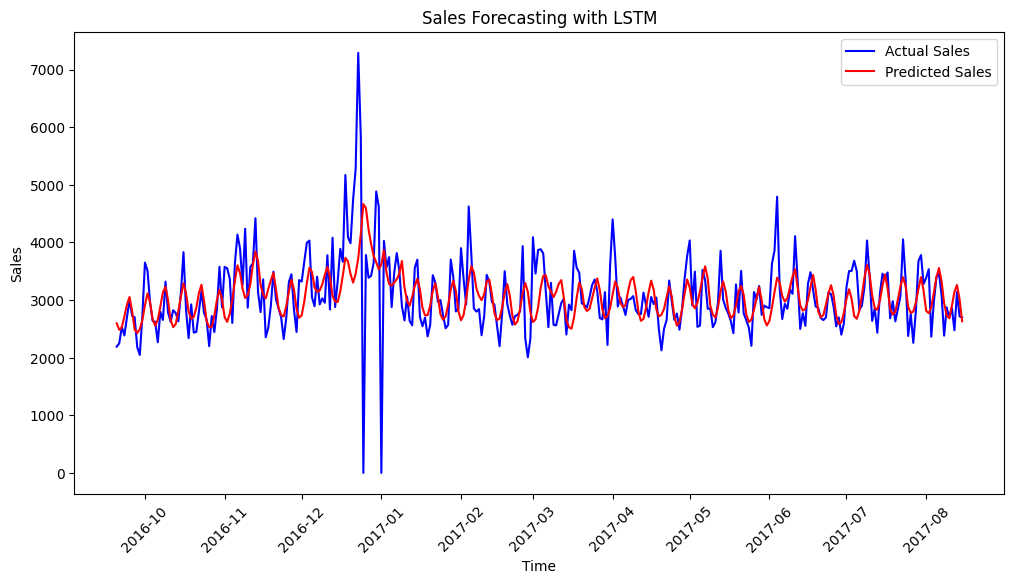

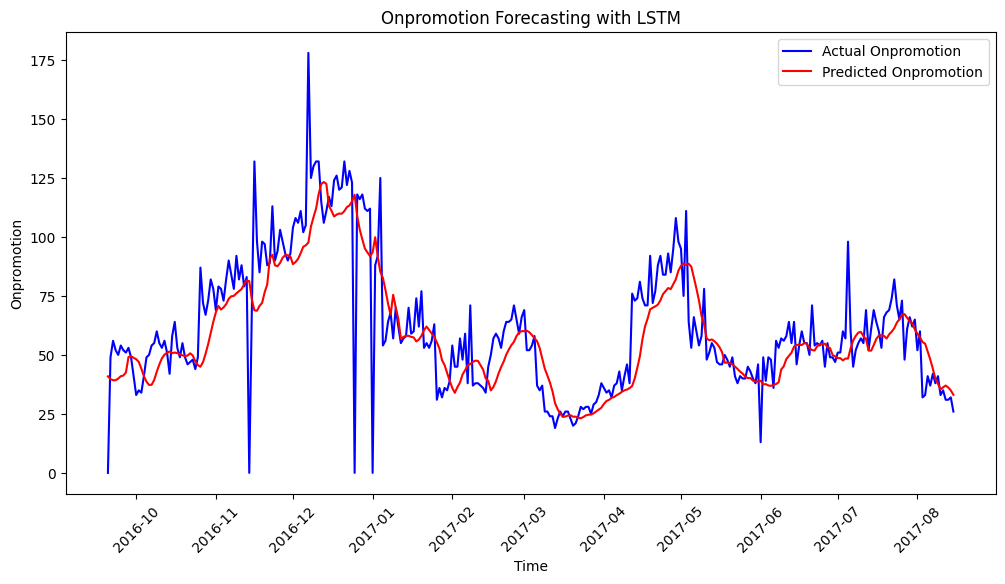

In [212]:
# Plot results for sales
plt.figure(figsize=(12, 6))
plt.plot(kolomTanggal['date'], y_test_unscaled_withDate['sales'], label='Actual Sales', color='blue')
plt.plot(kolomTanggal['date'], y_pred_unscaled_withDate['sales'], label='Predicted Sales', color='red')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.title('Sales Forecasting with LSTM')
plt.xticks(rotation=45)
plt.show()

# Plot results for onpromotion
plt.figure(figsize=(12, 6))
plt.plot(kolomTanggal['date'], y_test_unscaled_withDate['onpromotion'], label='Actual Onpromotion', color='blue')
plt.plot(kolomTanggal['date'], y_pred_unscaled_withDate['onpromotion'], label='Predicted Onpromotion', color='red')
plt.xlabel('Time')
plt.ylabel('Onpromotion')
plt.legend()
plt.title('Onpromotion Forecasting with LSTM')
plt.xticks(rotation=45)
plt.show()


# membandingkan kembali hasil Varmax dan LSTM

In [213]:
RMSE_Comparison ={
    "Topic" :['RMSE Sales','RMSE Onpromotion', 'Normalize RMSE'],
    "Varmax" : [varmax_rmse_sales,varmax_rmse_onpromotion,best_weighted_rmse],
    "LSTM" : [lstm_rmse_sales,lstm_rmse_onpromotion,lstm_weighted_rmse]
}

RMSE_Comparison_df = pd.DataFrame(RMSE_Comparison)
RMSE_Comparison_df

Topic      Varmax        LSTM
0        RMSE Sales  603.957319  597.977274
1  RMSE Onpromotion   28.289504   16.760521
2    Normalize RMSE    0.658661    0.466287